In [8]:
import matplotlib.pyplot as plt
import numpy as np

import bussilab
from bussilab import ann
import scipy
from scipy.optimize import minimize
%matplotlib notebook



N1met=6
N2met=0
Ntot=N1met+N2met
Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 9.9]
sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 0.5])

kbt=2.494
Ncha=6
Tr_size=int((Ncha**2+Ncha-2)/2)


In [9]:
W0=[]
app=np.load("../AFEC/A1_anti_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A1_syn_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A2_dup_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A2_ss_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A3_dup_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A3_ss_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A4_dup_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A4_ss_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A5_dup_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("../AFEC/A5_ss_fitA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC_RNA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC_Metad_Restart/logW.npy")
W0.append(np.exp(app))

In [10]:
dE=[]
app=np.load("../AFEC/A1_anti_fitA/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("../AFEC/A1_syn_fitA/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("../AFEC/A2_dup_fitA/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("../AFEC/A2_ss_fitA/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("../AFEC/A3_dup_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("../AFEC/A3_ss_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("../AFEC/A4_dup_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("../AFEC/A4_ss_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("../AFEC/A5_dup_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("../AFEC/A5_ss_fitA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC_RNA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC_Metad_Restart/DeE.npy")
dE.append((app))

In [11]:
Tr=[]
app=np.load("../AFEC/A1_anti_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append(app)
app=np.load("../AFEC/A1_syn_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append(app)
app=np.load("../AFEC/A2_dup_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append(app)
app=np.load("../AFEC/A2_ss_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append(app)
app=np.load("../AFEC/A3_dup_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("../AFEC/A3_ss_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("../AFEC/A4_dup_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("../AFEC/A4_ss_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("../AFEC/A5_dup_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("../AFEC/A5_ss_fitA/charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC_RNA/safer_Charges_Rerun/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC_Metad_Restart/safer_Charges_Rerun/Trans_vectors.npy")
Tr.append((app))

In [12]:
eta6=[]

app=np.loadtxt("../AFEC/A1_anti_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A1_syn_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A2_dup_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A2_ss_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A3_dup_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A3_ss_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A4_dup_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A4_ss_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A5_dup_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("../AFEC/A5_ss_fitA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC_RNA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC_Metad_Restart/COLVAR")
eta6.append(app[:,1])

In [13]:
#making all energies file of the same lenght
end=160000
W0tot=np.zeros((12,end))
Trtot=np.zeros((12,end,20))
eta6tot=np.zeros((12,end))
dEtot=np.zeros((12,end))

W0[10]=W0[10][::2]
Tr[10]=Tr[10][::2]
dE[10]=dE[10][::2]
eta6[10]=eta6[10][::2]

for i in range(12):
    W0tot[i]=W0[i][:end]
    Trtot[i]=Tr[i][:end]
    eta6tot[i]=eta6[i][:end]
    dEtot[i]=dE[i][:end]

In [14]:
W0=W0tot
dE=dEtot
Tr=Trtot
eta6=eta6tot

#subtracting torsional potential
import math
for i in range(len(W0)):
    dE[i]-=np.multiply([np.cos(eta6[i]-math.pi)+1],2.46).reshape(-1)
    
#renormilizing  
logZ=np.zeros((12,1))
logZ[:,0]=np.log(W0.sum(axis=1))

In [15]:
def give_lam(DeQ):
    DeLDeQ=np.zeros((len(DeQ),Tr_size))
    lam=np.zeros(Tr_size)
    for i in range(len(DeQ)):
        lam[2*i]=DeQ[i]
        lam[2*i+1]=DeQ[i]**2
        
        DeLDeQ[i,2*i]=1
        DeLDeQ[i,2*i+1]=2*DeQ[i]
        
    count=len(DeQ)*2     
    for i in range(len(DeQ)-1):
        for k in range(len(DeQ)-1-i):
            lam[count]=(DeQ[i]*DeQ[i+1+k])
            DeLDeQ[i+1+k,count]=DeQ[i]
            DeLDeQ[i,count]=DeQ[i+1+k]
            
            count+=1
    return(lam,DeLDeQ)

In [16]:
import cudamat as cm
    # this is necessary to allow for CUDA operation
cm.init(max_ones=W0.shape[1])
cm_Tr=cm.CUDAMatrix(np.array(Tr).reshape(-1,Tr_size))
cm_W0=cm.CUDAMatrix(np.reshape(np.array(W0).reshape(-1),(1,-1)))



def func_and_grad_cuda(par):
    pen=par[Ncha-1]
    DeQ=par[:Ncha-1]
    DeQ=np.array(DeQ)
    #The sixth parameter correspond to the amplitude of the cosine od the dihedral. 
    lam,DeLDeQ=give_lam(DeQ)

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    #tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))
    
    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        #
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(kbt)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/kbt)*esp_min-logZ[i][0]))
            print(i,DeG[-1])
            
            cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/kbt)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            DeGDePen.append(kbt*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
            for j in range(len(lam)):
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/kbt)*Tr[i][:,j]*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDel.append(kbt*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 

    else:
        print("use Cuda!")
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (2*N1met):
            DeG.append(-kbt*(_logsum((np.log(W0[i])-(1/kbt)*(arrS[i]+dE[i]+tors[i])))-logZ[i][0]))
            
            DeGDePen.append(kbt*sum(W0[i]*(1/kbt)*[np.cos(eta6[i]-math.pi)+1]*_softmax(-(1/kbt)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/kbt)*(arrS[i]+dE[i]+tors[i])))))
            for j in range(len(lam)):
                DeGDel.append(kbt*sum(W0[i]*(1/kbt)*Tr[i][:,j]*_softmax(-(1/kbt)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/kbt)*(arrS[i]+dE[i]+tors[i]))))) 
        
    

    DeGDel=np.array(DeGDel).reshape((2*Ntot,Tr_size))
    
    for i in range(Ntot):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))


    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    
    
    Cost=np.sum(Chi2)
    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))  #methyl group special case
    #Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ))**2))
    Cost+=Beta*pen*pen           

    

    for i in range(4):  #methyl group special case
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ))   
    #for i in range(Ncha-1):
    #    grad[i]+=2*alpha*(np.sum(DeQ)+DeQ[i])
    grad=np.append(grad,0)
                    
    grad[Ncha-1]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[Ncha-1] += 2*Beta*pen
    
    print("Chi2:",Chi2)
    print("grad5",grad[Ncha-1])
    
    return float(Cost),np.array(grad)

In [17]:
def Kish_size(par):
    
    pen=par[Ncha-1]
    DeQ=par[:Ncha-1]
    lam=give_lam(DeQ)[0]
    Kish=[]
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*Ntot):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            cm_we2=cm.CUDAMatrix(np.reshape((np.array(W0[i])*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)))**2,(1,-1)))
            Kish.append((cm_we.sum(axis=1).asarray()[0,0])**2/cm_we2.sum(axis=1).asarray()[0,0])
        
        
    else:
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (2*Ntot):
            Kish.append((np.sum(W0[i]*np.exp(-(1/kbt)*(arrS[i]+dE[i]))))**2/(np.sum((W0[i]*np.exp(-(1/kbt)*(arrS[i]+dE[i])))**2)))
        
    return ((np.sum(Kish),Kish)) 

In [18]:
def chis(par):
    pen=par[Ncha-1]
    DeQ=par[:Ncha-1]
    #The sixth parameter correspond to the amplitude of the cosine od the dihedral. For simplicity here
    # I consider it just as a penalty to the DeG measure in the anti state, so I just correct the Experimental values
    # that must be subtracted to a (DeG_anti - DeG_syn)  
    lam,DeLDeQ=give_lam(DeQ)
      
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/kbt)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(kbt)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/kbt)*esp_min-logZ[i][0]))
            

        
    else:
        print("Use Cuda")

    for i in range(Ntot):
        Chi2.append(((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i]))/(sig[i]*sig[i]))

    
    
    return (np.array(Chi2),np.array(DeG))

In [19]:
USE_CUDA=True
alpha=100
Beta=0
lambdas=scipy.optimize.minimize(func_and_grad_cuda, x0=np.zeros(Ncha) , method='L-BFGS-B',jac=True)

0 208.62447602443552
1 207.4198962774945
2 203.63944881180313
3 206.71794219938957
4 208.37522113889534
5 206.53483265832506
6 203.85028772587282
7 206.89871119343582
8 206.08981878374777
9 206.8926072334399
10 205.17733070134926
11 185.3545006869293
Chi2: [17.308871703522414, 4.6983537150632255, 5.692080933192957, 0.034811145807155386, 0.16563550740861657, 65.64170366338246]
grad5 -21.460932879771057
0 -3008.234541082406
1 -3033.1924613933584
2 -4389.185615861957
3 -3527.662192587412
4 -4468.020125488358
5 -3501.44709131743
6 -3292.7428579796747
7 -3419.442002976988
8 -3236.0878953220868
9 -3189.75458885113
10 -4212.414598169194
11 -8224.523525324938
Chi2: [232.07866021990083, 153324.00791971682, 195069.7896032141, 1931.992947689446, 409.90371327785084, 10678450.864403421]
grad5 -1425.2433080957105
0 168.3924968563035
1 162.14517535636702
2 149.81178357640212
3 163.02451018771526
4 165.03805139089937
5 165.02616370701327
6 164.025387819169
7 163.95335786605935
8 162.35560640693117
9 1

7 168.9502012332809
8 169.7628867127624
9 170.24955710344972
10 165.53771441363577
11 156.45606571024763
Chi2: [1.6413609914151353, 0.1629764409836251, 5.076820223390746, 0.002431724429826613, 0.3029153787726037, 0.44646589644420853]
grad5 -8.85575842677937
0 185.59691357584427
1 180.70719794251139
2 182.61799977577869
3 181.16549857030031
4 184.39077404897358
5 181.05206496827498
6 178.89708000501088
7 181.0383358524595
8 181.6233425400829
9 182.10021857930698
10 177.70100353198768
11 169.01813110983565
Chi2: [1.3259346632437792, 0.012604043886761302, 2.910969008152082, 0.01489552858678222, 0.3078255603753369, 0.9875996938387108]
grad5 -6.934314888133354
0 189.9855812126308
1 185.14904213795828
2 187.20611178126356
3 185.50610040289138
4 189.11768878145034
5 185.48111571232823
6 183.47873490839066
7 185.45414859584125
8 186.07130271016706
9 186.465138796075
10 182.2397562733908
11 173.40078185287803
Chi2: [1.4278119199735846, 2.663937314862523e-11, 2.468174095788118, 0.031850786957661

10 188.4780267571971
11 178.54327532782335
Chi2: [0.1719883022451878, 0.5416170203045337, 0.5542981089370221, 0.013124671458535011, 0.2754549184671257, 0.000805107895679685]
grad5 -1.3416841198775045
0 199.1183525504233
1 193.33471691459627
2 197.5069121001737
3 194.1889691850611
4 199.18713024008431
5 193.63860681954074
6 191.72887196510825
7 193.85471370361708
8 194.23768384776807
9 194.79172440163165
10 190.26376183343802
11 180.45035036620538
Chi2: [0.17775477105849716, 0.5386294807742985, 0.49528386349831455, 0.016203056092835472, 0.27021050456569445, 0.004998382671202772]
grad5 -1.2944151682933598
0 204.30122706030684
1 198.48703310326817
2 202.39752845367468
3 199.10515202579356
4 204.32883536082716
5 198.62764271707024
6 196.73207048547584
7 198.74997579643556
8 199.03454228302806
9 199.64738160181344
10 195.36998752631712
11 185.7403626913222
Chi2: [0.1573383409184981, 0.5217412938418614, 0.40260535388472785, 0.026899917731579296, 0.24319307546893934, 0.04873515323434672]
grad

0 249.83352731786394
1 243.03814865128126
2 245.41645737558676
3 242.62112526917414
4 249.1651144509417
5 242.8936227419257
6 240.44289641440193
7 242.51082012749708
8 241.72203010345535
9 242.92756851669557
10 240.30492120844968
11 230.28687666026292
Chi2: [0.16360001553682169, 0.24686263854697485, 0.14123991527350221, 0.02160762936405996, 0.0503070495434156, 0.009289676904411607]
grad5 1.5190904191920307
0 253.41875955485443
1 246.60362187060892
2 248.78602840803285
3 246.17742446959187
4 252.58305928995603
5 246.4033542648773
6 243.94036699919238
7 246.07600151155174
8 245.25626365448605
9 246.46322999047646
10 243.87272228604175
11 233.7624122536334
Chi2: [0.17691122248655375, 0.16986854258239872, 0.1742680742521268, 0.015365996363842768, 0.05001691231413906, 0.02948687315439671]
grad5 1.3449259498566624
0 259.8424054452855
1 252.94142207343833
2 254.56419321142556
3 252.48265723704907
4 258.64322683154523
5 252.57370317401637
6 250.0433191227325
7 252.4054783587294
8 251.369264095

1 265.2875326040564
2 266.58025099537315
3 264.88728086790957
4 271.7194675799428
5 264.7177255057791
6 262.1586372325368
7 264.94090777268764
8 263.44038158505845
9 264.6545444796222
10 262.9844547347421
11 252.88079067444124
Chi2: [0.0007069751824614988, 1.0168540715696827e-05, 0.001986547322973569, 0.009221835397804976, 0.048567426547053795, 0.027652699638817016]
grad5 0.0007148127054242325
0 271.62009734797897
1 265.2875326040286
2 266.5802509917584
3 264.88728086790906
4 271.71946757634356
5 264.7177255057522
6 262.15863723253375
7 264.9409077726633
8 263.44038158495334
9 264.6545444796218
10 262.98445473468365
11 252.88079067441956
Chi2: [0.0007069750323675973, 1.0168551171458227e-05, 0.001986547467421807, 0.009221835396415877, 0.0485674265261197, 0.027652699628837676]
grad5 0.0007147978248009741
0 271.6200782353875
1 265.28751831755636
2 266.58023844702615
3 264.88726560883606
4 271.71944934122644
5 264.717710231783
6 262.15862199490135
7 264.9408953726084
8 263.44036532455726
9

In [20]:
import math
lista=[]
lis_chis=[]

Beta=0
Kish=[]
for alpha in (0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000, 10000, 100000):
    lambdas=scipy.optimize.minimize(func_and_grad_cuda, x0=lambdas.x , method='L-BFGS-B',jac=True)
    #print(lambdas.message,lambdas.success,lambdas.fun)
    lista.append((alpha, lambdas.x))
    #lista_pippo.append((alpha, lambdas.x))
    lis_chis.append((alpha,chis(lambdas.x)))
    Kish.append(Kish_size(lambdas.x))

0 271.6200973450243
1 265.2875326040051
2 266.5802509886934
3 264.8872808679086
4 271.71946757329175
5 264.71772550572945
6 262.15863723253113
7 264.9409077726428
8 263.4403815848643
9 264.6545444796215
10 262.9844547346341
11 252.88079067440117
Chi2: [0.0007069749050989003, 1.0168560037037737e-05, 0.0019865475899034355, 0.009221835395245912, 0.048567426508379134, 0.02765269962037106]
grad5 0.0007147852071563545
0 -537.477052386712
1 -586.0745669801566
2 -1349.9254788488843
3 -802.4618869230882
4 -1304.5940591497058
5 -837.7778476603286
6 -697.8077208548652
7 -666.2498714430247
8 -656.9790504376912
9 -665.7303643838478
10 -871.3903286946169
11 -1122.6467149816003
Chi2: [1192.7198271884427, 62053.63183062599, 46213.28714247821, 97.72669125476841, 22.47530107019101, 38835.27013434105]
grad5 -724.32014182201
0 261.40255836164755
1 254.42800646865527
2 227.2234143859939
3 252.75042300150622
4 232.89560641229042
5 250.2397929869604
6 249.24671415374493
7 255.46001857867554
8 250.48108207314

0 268.7828946915159
1 262.4776786162995
2 264.00539036078675
3 262.19373754854684
4 269.03570930538854
5 262.05416064887874
6 259.3279528856793
7 262.1641748819586
8 260.5700631664973
9 261.86163082737426
10 260.2922662477058
11 250.39188840588378
Chi2: [1.8138293775280698e-05, 0.002565092691580516, 0.0028869795832578106, 0.013083938747923723, 0.03432448058467134, 9.517629498561601e-08]
grad5 0.008425579578826278
0 268.8244431551062
1 262.51928260798667
2 264.0427272113787
3 262.2307024489626
4 269.0763432039765
5 262.09074131758484
6 259.3704422795097
7 262.2027697822994
8 260.6128158615419
9 261.90172248591443
10 260.32853521078965
11 250.4297665355665
Chi2: [1.7754164382104713e-05, 0.0025822113980220308, 0.002692783620813245, 0.012782589017413653, 0.0347732023631228, 1.0107738040529251e-06]
grad5 0.011849483436465243
0 268.8491688287232
1 262.5462931608978
2 264.05418836052723
3 262.2472246628303
4 269.0919045842729
5 262.10657062143565
6 259.3999946297077
7 262.22272159085765
8 260

1 262.0920658225553
2 263.6152457779275
3 261.789779349783
4 268.6324218296164
5 261.6553224995253
6 258.9491351613002
7 261.756019515612
8 260.18854345843346
9 261.4735778479766
10 259.87824221191835
11 249.97957677745157
Chi2: [9.35556676107859e-06, 0.003239058557889868, 0.0031079371736737697, 0.010900232282567382, 0.03543136993041338, 1.1873767749760387e-06]
grad5 -0.007482940936299075
0 268.388314952748
1 262.0920667647732
2 263.6152467185563
3 261.78978219936164
4 268.632422770252
5 261.65531962704637
6 258.94913301553254
7 261.75601475867376
8 260.18854155107675
9 261.47357594060674
10 259.8782403045438
11 249.97957487009333
Chi2: [9.384062315184739e-06, 0.0032389599952158846, 0.003107744323032323, 0.01090004679090195, 0.03543136993266541, 1.1873768040056173e-06]
grad5 -0.007496349259972167
0 268.388314952748
1 262.0920667647732
2 263.6152467185563
3 261.78978219936164
4 268.632422770252
5 261.65531962704637
6 258.94913301553254
7 261.75601475867376
8 260.18854155107675
9 261.473

0 268.388314952748
1 262.0920667647732
2 263.6152467185563
3 261.78978219936164
4 268.632422770252
5 261.65531962704637
6 258.94913301553254
7 261.75601475867376
8 260.18854155107675
9 261.47357594060674
10 259.8782403045438
11 249.97957487009333
Chi2: [9.384062315184739e-06, 0.0032389599952158846, 0.003107744323032323, 0.01090004679090195, 0.03543136993266541, 1.1873768040056173e-06]
grad5 -0.007496349259972167
0 268.388314952748
1 262.0920667647732
2 263.6152467185563
3 261.78978219936164
4 268.632422770252
5 261.65531962704637
6 258.94913301553254
7 261.75601475867376
8 260.18854155107675
9 261.47357594060674
10 259.8782403045438
11 249.97957487009333
Chi2: [9.384062315184739e-06, 0.0032389599952158846, 0.003107744323032323, 0.01090004679090195, 0.03543136993266541, 1.1873768040056173e-06]
grad5 -0.007496349259972167
0 268.388314952748
1 262.0920667647732
2 263.6152467185563
3 261.78978219936164
4 268.632422770252
5 261.65531962704637
6 258.94913301553254
7 261.75601475867376
8 260.

1 262.4432252294775
2 263.9399488597088
3 262.1268913785448
4 268.9723789434808
5 261.9897822377852
6 259.30182444624467
7 262.10266346806696
8 260.5445478834179
9 261.82139950010895
10 260.2153370477775
11 250.31437763393424
Chi2: [6.249253646382388e-07, 0.00263003992739584, 0.0028361180068989873, 0.010475013547569143, 0.036842500884154805, 6.136499484169077e-07]
grad5 -0.0007470940827234169
0 268.7388897614692
1 262.43807825362535
2 263.9351393714559
3 262.12204950552774
4 268.96748755675213
5 261.9849030915601
6 259.2966374806131
7 262.09770929742996
8 260.53931507781544
9 261.81628650774036
10 260.2105472473302
11 250.30980570662865
Chi2: [4.390299870677145e-07, 0.0026315468674163356, 0.002836709426799188, 0.010491231352016302, 0.036821640143986145, 3.665884080604148e-07]
grad5 -0.0011419431716851638
0 268.743926651109
1 262.4429635340348
2 263.93970323633147
3 262.1266493665286
4 268.9721318931752
5 261.98953612155253
6 259.3015637689228
7 262.1024138384595
8 260.544284890832
9 26

1 262.4432223570136
2 263.9399441031929
3 262.1268913785449
4 268.9723789438906
5 261.98978223778823
6 259.3018234811264
7 262.10266441029995
8 260.54454787197585
9 261.8213995001144
10 260.2153341867612
11 250.31437381923948
Chi2: [6.261723822654138e-07, 0.002629818631756616, 0.002836117987246183, 0.01047514637337993, 0.036842498890738394, 6.148705178483446e-07]
grad5 -0.0007484127536798648
0 268.7441915105481
1 262.4432223570136
2 263.9399441031929
3 262.1268913785449
4 268.9723789438906
5 261.98978223778823
6 259.3018234811264
7 262.10266441029995
8 260.54454787197585
9 261.8213995001144
10 260.2153341867612
11 250.31437381923948
Chi2: [6.261723822654138e-07, 0.002629818631756616, 0.002836117987246183, 0.01047514637337993, 0.036842498890738394, 6.148705178483446e-07]
grad5 -0.0007484127536798648
0 268.7441915105481
1 262.4432223570136
2 263.9399441031929
3 262.1268913785449
4 268.9723789438906
5 261.98978223778823
6 259.3018234811264
7 262.10266441029995
8 260.54454787197585
9 261.8

1 264.41991981210725
2 265.8026513293918
3 264.06181068546016
4 270.90288605017753
5 263.90622319952473
6 261.28105097054856
7 264.0787082359466
8 262.5390690495883
9 263.7862457921215
10 262.15243765966596
11 252.25599243370033
Chi2: [0.0005120816560172516, 0.0003432012750513033, 0.0021972358920177167, 0.010254611995859343, 0.04219113220222877, 8.424278956929856e-06]
grad5 0.022121428573851153
0 270.62595071148183
1 264.3027072135397
2 265.69013693577404
3 263.94091989248807
4 270.79582947073663
5 263.78496691780236
6 261.1648442102984
7 263.9596481553331
8 262.4239762328437
9 263.66764177075464
10 262.03419612395754
11 252.11353735689937
Chi2: [0.0003601734643909778, 0.0004984192077803941, 0.0016348733476122842, 0.010058954399079655, 0.04284797145887025, 0.00028452310424250933]
grad5 0.02874869873232558
0 270.68552059990105
1 264.3602272029191
2 265.74771243736217
3 263.9996020188006
4 270.85278619177126
5 263.8439339139063
6 261.22176733273653
7 264.0183538886416
8 262.4811083531382

1 265.6307576204926
2 267.0224098851618
3 265.25860760188687
4 272.11888919892215
5 265.12104365782955
6 262.48862218319624
7 265.2710491211437
8 263.7468263475128
9 264.9915212372028
10 263.3480095520351
11 253.42700322152
Chi2: [8.981418070477549e-05, 0.0008375990434346177, 0.002147229110013015, 0.009232057323884721, 0.04265488548856344, 0.0002941772811388904]
grad5 -0.00045633785975931736
0 271.94236458868875
1 265.6307566784133
2 267.02240896257666
3 265.2586076018896
4 272.1188882762537
5 265.12104177351506
6 262.4886221832019
7 265.2710481790455
8 263.7468263480838
9 264.991521237463
10 263.3480085986784
11 253.42700322163782
Chi2: [8.982905397491194e-05, 0.0008375748200661377, 0.002147188683688638, 0.009231995732435981, 0.04265488554679059, 0.0002941505764114524]
grad5 -0.00045379285999134545
0 271.9423645886884
1 265.6307566784133
2 267.0224089625763
3 265.2586076018896
4 272.11888827625336
5 265.12104177351506
6 262.4886221832019
7 265.2710481790455
8 263.7468263480838
9 264.9

1 265.56747241012323
2 266.90173266103244
3 265.1797690419908
4 271.9968439843883
5 265.03876550383234
6 262.4317437159747
7 265.2039606652934
8 263.69917744639747
9 264.93454090689426
10 263.2683820918786
11 253.2569948753938
Chi2: [3.5099905228826834e-08, 9.925937477474743e-05, 0.004144386354177455, 0.008576628182451598, 0.04442121683981944, 0.008271407997490767]
grad5 -0.0960927010545446
0 272.4165670789995
1 266.1073113710118
2 267.427721716373
3 265.7049131997643
4 272.5384192262712
5 265.55916960176813
6 262.97542053248776
7 265.7379227296007
8 264.246312812153
9 265.4690441963727
10 263.7922731181314
11 253.7823036858407
Chi2: [5.7112086902240325e-05, 0.00010704288680871934, 0.003000134399723579, 0.007975393922352634, 0.0468694097960613, 0.008062184025557492]
grad5 -0.0546531894532654
0 272.49963980753614
1 266.1911941899686
2 267.50522282560905
3 265.78775439069864
4 272.62115124893154
5 265.639541394492
6 263.05959036149204
7 265.8228411906178
8 264.3308245585677
9 265.5516304

0 272.0009991591754
1 265.67861620985457
2 266.9839526606434
3 265.279422688118
4 272.12159315010484
5 265.1156026610254
6 262.5477198995731
7 265.32502698576553
8 263.8222486113286
9 265.0390055599205
10 263.3726687899731
11 253.35793938573264
Chi2: [0.0003339976135332872, 4.222356189467575e-06, 0.0018184749266497988, 0.008900372691265238, 0.0480501742251421, 0.008775224131579818]
grad5 -0.013431880753062507
0 272.06698113665897
1 265.7317612784055
2 267.05346107471115
3 265.3311175325223
4 272.19476696681176
5 265.1667377374531
6 262.6010572019718
7 265.37661583980815
8 263.87452248873814
9 265.0896175789204
10 263.42401860911997
11 253.42734413441198
Chi2: [0.0008269589435968759, 0.00010272302007112467, 0.001065800787388801, 0.008788491074794819, 0.048381228717147534, 0.006230636040043459]
grad5 0.05242516766945102
0 272.0189075295214
1 265.6930408619756
2 267.00282327118055
3 265.29345274084704
4 272.1414581162023
5 265.12948266183537
6 262.56219443852905
7 265.33902888050415
8 263

1 265.6813783186738
2 266.98951326826
3 265.2857321052695
4 272.12686873021437
5 265.1210913963018
6 262.54946502835656
7 265.3308378802727
8 263.8232972368549
9 265.0425085303672
10 263.37894295059465
11 253.37444615543666
Chi2: [0.0005111506106598098, 2.9418093746054823e-06, 0.0018267306182344575, 0.00916327335595293, 0.04756332927698375, 0.007279720132193985]
grad5 -0.00032891053685414466
0 272.0090670911044
1 265.6813821325629
2 266.98951504748754
3 265.2857368621824
4 272.1268724401306
5 265.1210961524473
6 262.549466935616
7 265.33083787956537
8 263.823296291566
9 265.04251234367075
10 263.3789439025676
11 253.37445091173302
Chi2: [0.000510971286296784, 2.937177818969194e-06, 0.0018267711857483072, 0.009163149085526748, 0.04756238776826148, 0.007279190089034756]
grad5 -0.0003449200229143747
0 272.0090670911044
1 265.6813821325629
2 266.98951504748754
3 265.2857368621824
4 272.1268724401306
5 265.1210961524473
6 262.549466935616
7 265.33083787956537
8 263.823296291566
9 265.042512

0 271.91427174236713
1 265.5816544643812
2 266.9222405449766
3 265.1808580665691
4 272.05873499173845
5 265.0224728581786
6 262.44997704081317
7 265.2260592393264
8 263.7274232125556
9 264.9436292765871
10 263.2800349033929
11 253.1912267491309
Chi2: [0.0007092578821416682, 0.00035236821381632883, 0.0008359085634454392, 0.008821919020358147, 0.048159788576110425, 0.023765679410551566]
grad5 0.06798541587893354
0 271.84966057419626
1 265.5198683951913
2 266.8559095317662
3 265.12017659300926
4 271.9918912577733
5 264.96121416465917
6 262.38810366873724
7 265.1655348942731
8 263.6656961890644
9 264.88260295699456
10 263.2195238032613
11 253.12828877671586
Chi2: [0.000591715953243295, 0.00026272487905497555, 0.0009888200450831643, 0.008908343159991138, 0.0480203849530253, 0.02438055691856228]
grad5 0.051491291310795405
0 271.57531944881015
1 265.25809488975995
2 266.57075679473525
3 264.8626968008727
4 271.703908986069
5 264.70097543069164
6 262.1262844516604
7 264.9090707277597
8 263.404

0 271.615808848722
1 265.2833892505699
2 266.5761588805216
3 264.88314406329255
4 271.7159504537985
5 264.7133805461865
6 262.15448583475705
7 264.93692652359096
8 263.4362480477295
9 264.65028003133887
10 262.9804837813527
11 252.87668610482723
Chi2: [0.0007006868962297231, 1.0039666325903789e-05, 0.0019532145890405516, 0.009232956332056556, 0.04859360348861471, 0.02768899530478387]
grad5 0.0010403329038073546
0 271.615808848722
1 265.2833892505699
2 266.5761588805216
3 264.88314406329255
4 271.7159504537985
5 264.7133805461865
6 262.15448583475705
7 264.93692652359096
8 263.4362480477295
9 264.65028003133887
10 262.9804837813527
11 252.87668610482723
Chi2: [0.0007006868962297231, 1.0039666325903789e-05, 0.0019532145890405516, 0.009232956332056556, 0.04859360348861471, 0.02768899530478387]
grad5 0.0010403329038073546
0 271.61580882873596
1 265.2833892504106
2 266.5761636167168
3 264.8831478779869
4 271.71595043315523
5 264.71338054603245
6 262.15448392739086
7 264.93693128037904
8 263

1 265.10560828970654
2 266.46198829627826
3 264.6956842950538
4 271.59999234099985
5 264.53765647774344
6 261.97696712739554
7 264.7494694496962
8 263.2659341333383
9 264.47360276997625
10 262.8044212453777
11 252.54089385644565
Chi2: [0.0012162349757517592, 0.0009045721354676021, 0.00029189036967901055, 0.00859461986797043, 0.049874520853896535, 0.08810144166916094]
grad5 0.13625541329284047
0 271.2944146660706
1 264.9580859848652
2 266.30522250445995
3 264.5506664698992
4 271.442152161772
5 264.39151869699856
6 261.82912257506393
7 264.60471920002
8 263.11841479748983
9 264.327756577534
10 262.6599784224433
11 252.3891331010557
Chi2: [0.0008798487187505077, 0.0006124199397100066, 0.0005014516049945878, 0.008790914315644275, 0.04953610880869087, 0.09168416826338692]
grad5 0.10055760016649117
0 270.8240428291909
1 264.50777638164084
2 265.8228093386729
3 264.10773213109945
4 270.9555865908169
5 263.9448768754869
6 261.37820633555106
7 264.1628328472289
8 262.6686710824317
9 263.8830208

1 264.53386880283267
2 265.83393378243454
3 264.1301084968152
4 270.9662486038697
5 263.9629358313542
6 261.40665344275084
7 264.18928817613124
8 262.69960896389927
9 263.9105735837629
10 262.2373196525759
11 251.94238634352615
Chi2: [0.0005618167424595169, 3.0108662694811357e-06, 0.0019235432013650063, 0.009245647281598691, 0.04920897181586314, 0.10398154573131012]
grad5 0.0020909887559189735
0 270.8628995978556
1 264.53387450298385
2 265.83393866870796
3 264.13011325410827
4 270.9662487326602
5 263.9629358323153
6 261.40665250063023
7 264.1892881770007
8 262.6996089676588
9 263.9105726415455
10 262.23732346936436
11 251.94239300857802
Chi2: [0.0005616374215417407, 3.0110693126613327e-06, 0.0019235381151679355, 0.00924570897655139, 0.049209162193077506, 0.10398004590460312]
grad5 0.0020790356371642935
0 270.8628995978556
1 264.53387450298385
2 265.83393866870796
3 264.13011325410827
4 270.9662487326602
5 263.9629358323153
6 261.40665250063023
7 264.1892881770007
8 262.6996089676588
9 

1 264.5307653414626
2 265.83046779542053
3 264.12698708050004
4 270.9624164380651
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 262.696521462844
9 263.90754763559164
10 262.2341032858898
11 251.9391055588309
Chi2: [0.0005505332110919292, 2.4928757937671345e-06, 0.0019563819191591256, 0.009236584751775068, 0.04919658513123371, 0.10401546958778239]
grad5 0.0003792718653368842
0 270.85950207434297
1 264.5307653414626
2 265.83046779542065
3 264.12698708050004
4 270.96241643806513
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 262.696521462844
9 263.90754763559164
10 262.2341032858898
11 251.9391055588309
Chi2: [0.0005505332110919292, 2.492875793929979e-06, 0.0019563819191568445, 0.009236584751775068, 0.04919658513123371, 0.10401546958778239]
grad5 0.00037927186547504713
0 270.85950207434297
1 264.5307653414626
2 265.8304677954206
3 264.12698708050004
4 270.9624164380651
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 262.696521462844
9 

0 270.859502074343
1 264.5307653414626
2 265.83046779542065
3 264.12698708050004
4 270.96241643806513
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 262.696521462844
9 263.90754763559164
10 262.2341032858898
11 251.9391055588309
Chi2: [0.0005505332110941072, 2.492875793929979e-06, 0.0019563819191568445, 0.009236584751775068, 0.04919658513123371, 0.10401546958778239]
grad5 0.00037927186562403906
0 270.859502074343
1 264.5307653414626
2 265.83046779542065
3 264.12698708050004
4 270.96241643806513
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 262.696521462844
9 263.90754763559164
10 262.2341032858898
11 251.9391055588309
Chi2: [0.0005505332110941072, 2.492875793929979e-06, 0.0019563819191568445, 0.009236584751775068, 0.04919658513123371, 0.10401546958778239]
grad5 0.00037927186562403906
0 270.859502074343
1 264.5307653414626
2 265.83046779542065
3 264.12698708050004
4 270.96241643806513
5 263.95992549470657
6 261.40357291280816
7 264.18606909376524
8 2

1 262.57970422701965
2 263.9340899032709
3 262.1701479408773
4 269.0513425282496
5 262.0188267683842
6 259.44995986376966
7 262.2362070468686
8 260.77088024423676
9 261.97538270214136
10 260.31257191571234
11 249.47802011982012
Chi2: [7.288332271528714e-05, 0.00084127048451465, 0.0009370622770662121, 0.009483501137973645, 0.0505180687700796, 0.5822580394702541]
grad5 -0.027472004122419423
0 268.8692454051122
1 262.57970422629785
2 263.93408792482694
3 262.1701479406117
4 269.0513414921933
5 262.0188220107583
6 259.44995604899276
7 262.2362051388882
8 260.7708811837353
9 261.9753827021321
10 260.31257000835626
11 249.47802299085703
Chi2: [7.292462706192075e-05, 0.0008412184323965327, 0.0009369589271203149, 0.00948362748448572, 0.05051826034384371, 0.5822520852778071]
grad5 -0.027478377793080006
0 268.8692454051123
1 262.57970422629785
2 263.93408792482694
3 262.1701479406117
4 269.05134149219333
5 262.0188220107583
6 259.44995604899276
7 262.2362051388882
8 260.7708811837353
9 261.97538

1 262.5796956100553
2 263.93407757381516
3 262.1701364969462
4 269.0513263840013
5 262.0188162669452
6 259.44995030418653
7 262.23619652250113
8 260.77087068625826
9 261.97537507275246
10 260.31256044873686
11 249.47801249129094
Chi2: [7.298896530804118e-05, 0.0008412471833663474, 0.0009372189917239946, 0.009483437210579966, 0.05051767551512261, 0.5822532565108942]
grad5 -0.027497153900012273
0 268.86924540512615
1 262.57970422629796
2 263.93408792484126
3 262.1701479406117
4 269.05134149220765
5 262.0188220107584
6 259.44995604899276
7 262.2362051388883
8 260.77088118373575
9 261.9753827021321
10 260.31257000835626
11 249.47802299085723
Chi2: [7.292462686929784e-05, 0.0008412184327734508, 0.0009369589267241044, 0.009483627484493252, 0.05051826034393644, 0.5822520852775593]
grad5 -0.027478377733721606
0 268.8692454051085
1 262.5797042262978
2 263.934087924823
3 262.1701479406117
4 269.05134149218935
5 262.0188220107583
6 259.44995604899276
7 262.2362051388881
8 260.77088118373524
9 261

0 265.79935836548793
1 259.55522394489157
2 261.03079825593414
3 259.13688395929654
4 266.124662232647
5 259.0128264663447
6 256.4139197227201
7 259.2080676612569
8 257.7758312886029
9 258.97130531892054
10 257.3348950892631
11 245.6832531142407
Chi2: [0.0020806419747357086, 0.007737192271698901, 2.882414896354218e-05, 0.010014237239057271, 0.052375813597512436, 2.045499739106949]
grad5 0.025345801444027656
0 265.8530870516974
1 259.6134904252742
2 261.0660193614114
3 259.19391413192784
4 266.16245246564364
5 259.06511931046936
6 256.47313965991776
7 259.26834764265976
8 257.837563238269
9 259.02997502169825
10 257.39023396247177
11 245.73582764235647
Chi2: [0.0024323783596406664, 0.006094693418845858, 1.4633871037965324e-06, 0.010086545494745438, 0.05301353860112937, 2.0519610240403368]
grad5 -0.015972307165827863
0 265.8573812433687
1 259.6191843078632
2 261.07137395797145
3 259.19965559482506
4 266.1710294583744
5 259.0696581079819
6 256.47865264621964
7 259.2748846519678
8 257.8431

1 256.1870934919972
2 258.4600689349856
3 255.61148338117806
4 263.50242887792155
5 255.61119169891182
6 253.03674444586989
7 255.70146097480773
8 254.577342780679
9 255.58826065802944
10 253.96200446501555
11 239.6904142896208
Chi2: [0.028093423992513772, 0.27145036510604315, 0.1288181632607535, 0.003140223947376379, 0.09770250447638427, 12.74053377440526]
grad5 2.1207232940541605
0 256.0191602990676
1 249.67211818449343
2 251.72572210400094
3 249.10163229087937
4 256.7179589190249
5 249.08842422769982
6 246.45993060252303
7 249.20962969478035
8 248.0726493733576
9 249.0967764878955
10 247.48958428250728
11 232.29214088116157
Chi2: [0.0014753070290735018, 0.17570822689610308, 0.05769691138204933, 0.0072163931335795925, 0.093992624959432, 18.70860439364079]
grad5 1.3147954368363215
0 233.9284643732221
1 227.98369210834153
2 229.48633298615135
3 227.37642498723832
4 234.32224410056708
5 227.29192048086685
6 224.57883755859947
7 227.52538911002384
8 226.45848166939186
9 227.4464539479104

1 216.9109572898032
2 218.299704329055
3 216.24404651012807
4 223.00729390287435
5 216.11508683090844
6 213.4326636623511
7 216.39924244011542
8 215.58815290316366
9 216.39504581201072
10 214.66975921519045
11 195.4821421731719
Chi2: [0.0019504073077837036, 0.026027260116021012, 0.008884341757403092, 0.025196268039356373, 0.16412351363532177, 57.506553546129034]
grad5 0.00044792253360259604
0 223.15566011672013
1 216.90983536562678
2 218.2984788373536
3 216.24291482136826
4 223.00608630431466
5 216.11395029183572
6 213.43153297236645
7 216.3981212246521
8 215.58703727168898
9 216.39391718800877
10 214.6686377799935
11 195.48094709570478
Chi2: [0.0019566383960648464, 0.026013532811445042, 0.008890419199208638, 0.025197291339233104, 0.16412828886274716, 57.507465498015705]
grad5 8.807185820922103e-05
0 223.15686729427486
1 216.91095633590714
2 218.29970229677664
3 216.24404460277694
4 223.0072909212772
5 216.1150849233368
6 213.43266270865504
7 216.39924053255578
8 215.58815479901926
9 2

1 216.91095347486146
2 218.29970133029803
3 216.24404364910234
4 223.00729375849818
5 216.1150830159653
6 213.43266080130417
7 216.39923862518555
8 215.5881528916656
9 216.3950439045154
10 214.6697563533711
11 195.4821383573925
Chi2: [0.0019506227164804806, 0.02602723995751034, 0.008884027884513618, 0.025196165015958807, 0.16412421047910497, 57.50656535948368]
grad5 0.00044294108864106896
0 223.1568662861723
1 216.91095538213597
2 218.29969748530937
3 216.2440446027758
4 223.0072937182178
5 216.11508777281827
6 213.43266175497124
7 216.39923862511506
8 215.58815004207037
9 216.39504390447095
10 214.66975635312977
11 195.4821402644132
Chi2: [0.0019504202014453238, 0.026026537624369055, 0.008884438092038108, 0.025196062008473154, 0.16412316317237544, 57.50654174092454]
grad5 0.00044250237124587866
0 223.15686630699736
1 216.91095347482442
2 218.2997013094303
3 216.2440426954276
4 223.00729373835796
5 216.115083015928
6 213.43266175497484
7 216.3992386251503
8 215.58815004207858
9 216.395

0 223.15685961036502
1 216.91094870641564
2 218.29969652010374
3 216.2440388807299
4 223.0072879960877
5 216.11508300444655
6 213.43266078985283
7 216.3992376599965
8 215.58814716960333
9 216.39503818242497
10 214.66975063108336
11 195.48213454236662
Chi2: [0.001950420207715477, 0.026027233836413196, 0.008884519649968742, 0.02519606200845474, 0.1641242104894569, 57.50654174092665]
grad5 0.0004455422312796553
0 223.15685961036502
1 216.91094870641564
2 218.29969652010374
3 216.2440388807299
4 223.0072879960877
5 216.11508300444655
6 213.43266078985283
7 216.3992376599965
8 215.58814716960333
9 216.39503818242497
10 214.66975063108336
11 195.48213454236662
Chi2: [0.001950420207715477, 0.026027233836413196, 0.008884519649968742, 0.02519606200845474, 0.1641242104894569, 57.50654174092665]
grad5 0.0004455422312796553
0 223.15685770298103
1 216.91094679906695
2 218.29969270537103
3 216.24403506603264
4 223.00728608870486
5 216.11508014342348
6 213.43265697515554
7 216.39923479897345
8 215.58

0 214.4159017883769
1 208.30194306205237
2 209.42399204073476
3 207.601297250572
4 214.1377635342264
5 207.42271099770807
6 204.73808334441472
7 207.77778955769654
8 206.98161366516055
9 207.77726124195456
10 206.04975924585463
11 186.31207612156246
Chi2: [0.023074237007191484, 0.0030975332372598636, 0.03049064807427419, 0.03371328664988415, 0.16828257311904216, 64.52000616932203]
grad5 -0.6773879308211445
0 214.41595610679778
1 208.30200682919943
2 209.42405621236367
3 207.60136254726763
4 214.13781823254837
5 207.42277680049557
6 204.73815113579232
7 207.77785357212716
8 206.98167421959522
9 207.77732380396193
10 206.04982185283757
11 186.31213582404274
Chi2: [0.023076580870783528, 0.0030974764310080574, 0.030492407209045, 0.03371281479001814, 0.16828182597862074, 64.52004426742994]
grad5 -0.6774225209781721
0 214.41590276121877
1 208.30194377734222
2 209.42399265598806
3 207.601298323456
4 214.1377641488101
5 207.42271195141666
6 204.7380841788831
7 207.77779051140328
8 206.98161461

1 208.30197527346854
2 209.42402443421057
3 207.6013280867004
4 214.13779113110812
5 207.42274443556082
6 204.7381200954061
7 207.77782204176526
8 206.98164435961417
9 207.77729516965314
10 206.04979087722737
11 186.31210882817925
Chi2: [0.023075399149584716, 0.0030976118708513187, 0.030491573376348214, 0.03371275357683796, 0.1682813698319251, 64.51999206544238]
grad5 -0.6774036758978744
0 214.4159294357738
1 208.3019753330763
2 209.42402455515432
3 207.60132808670045
4 214.13779125199133
5 207.42274443556394
6 204.7381200954064
7 207.77782204176822
8 206.98164447882414
9 207.77729522925964
10 206.04979093684204
11 186.31210870898354
Chi2: [0.023075383935400613, 0.0030976179775826194, 0.030491554226890566, 0.03371275357716818, 0.16828139201396633, 64.51999441088198]
grad5 -0.6774032750456865
0 214.41592931483373
1 208.30197527346854
2 209.42402443421068
3 207.6013280867004
4 214.13779113110817
5 207.42274443556082
6 204.7381200954061
7 207.77782204176526
8 206.98164435961417
9 207.7772

1 208.30073454195843
2 209.42277955985563
3 207.60008518395395
4 214.13654134993038
5 207.42149493334898
6 204.7368783259794
7 207.7765728424137
8 206.98042713155274
9 207.77605195201727
10 206.04853486397295
11 186.31084413768764
Chi2: [0.02307173568046, 0.0030975123205559357, 0.030491617569304453, 0.03371182535523879, 0.16829104225510755, 64.52010588402663]
grad5 -0.6773667459029135
0 214.41070226952434
1 208.29673585965972
2 209.4187739476829
3 207.59608961910615
4 214.1325118273546
5 207.41747631929357
6 204.7328737483441
7 207.7725730038451
8 206.9764571527838
9 207.77206025633075
10 206.04453414286803
11 186.30668088300615
Chi2: [0.023072331105773197, 0.003097005036692571, 0.03049334569008968, 0.033712417406057876, 0.16829912475595277, 64.52223784171666]
grad5 -0.6773895355268714
0 214.41394443423937
1 208.29997488862347
2 209.42202335309557
3 207.59932776760652
4 214.13577854341085
5 207.42073462693438
6 204.73612163920097
7 207.7758170183766
8 206.97967738586684
9 207.775295804

In [23]:
Kish0=Kish_size(np.zeros(6))[0]
ksr=np.multiply(np.array(Kish)[:,0],1/Kish0)


x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
summ=[]
for i in range(len(lis_chis)):
    x1.append(lis_chis[i][1][0][0])
    x2.append(lis_chis[i][1][0][1])
    x3.append(lis_chis[i][1][0][2])
    x4.append(lis_chis[i][1][0][3])
    x5.append(lis_chis[i][1][0][4])
    x6.append(lis_chis[i][1][0][5])
    summ.append(np.average(lis_chis[i][1][0]))
    
Al=[]
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q0=[]
tor=[]
for i in range(len(lista)):
    Al.append(lista[i][0])
    q1.append(lista[i][1][0])
    q2.append(lista[i][1][1])
    q3.append(lista[i][1][2])
    q4.append(lista[i][1][3])
    q5.append(lista[i][1][4])
    tor.append(lista[i][1][5])

q0=-np.array(q1)-np.array(q2)-np.array(q3)-np.array(q4)-np.array(q5)/3

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


<IPython.core.display.Javascript object>


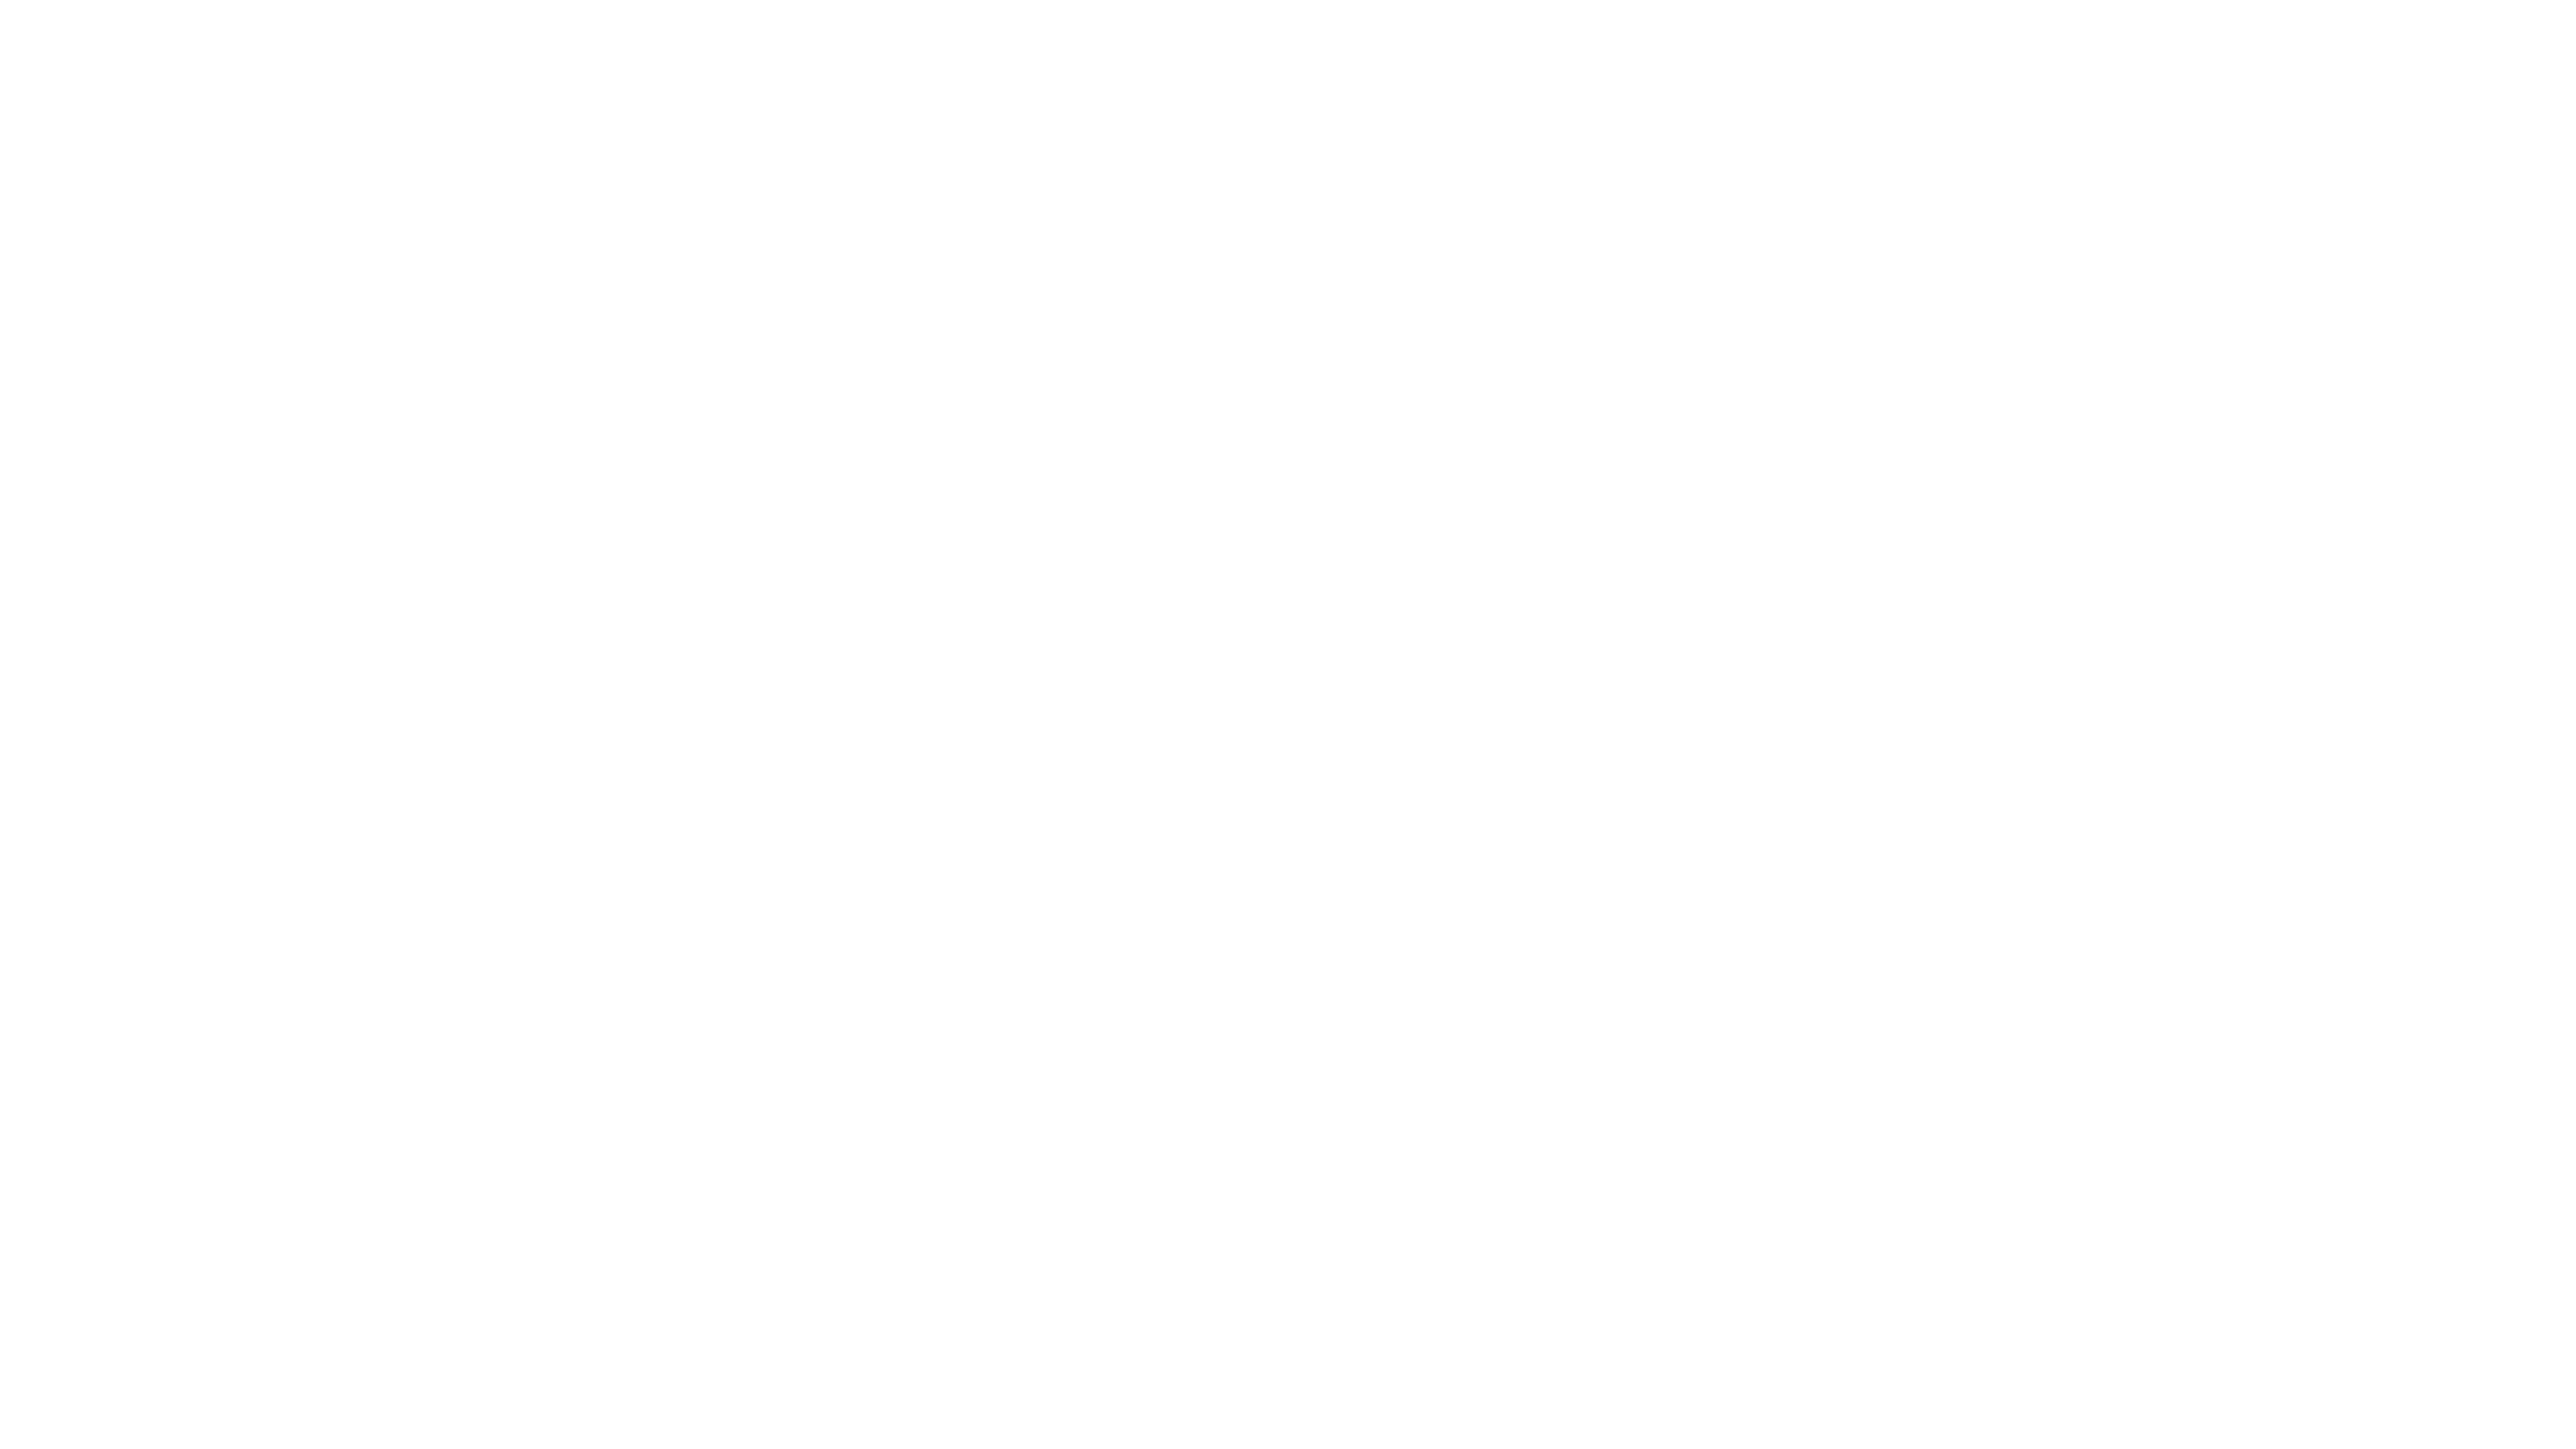

<IPython.core.display.Javascript object>


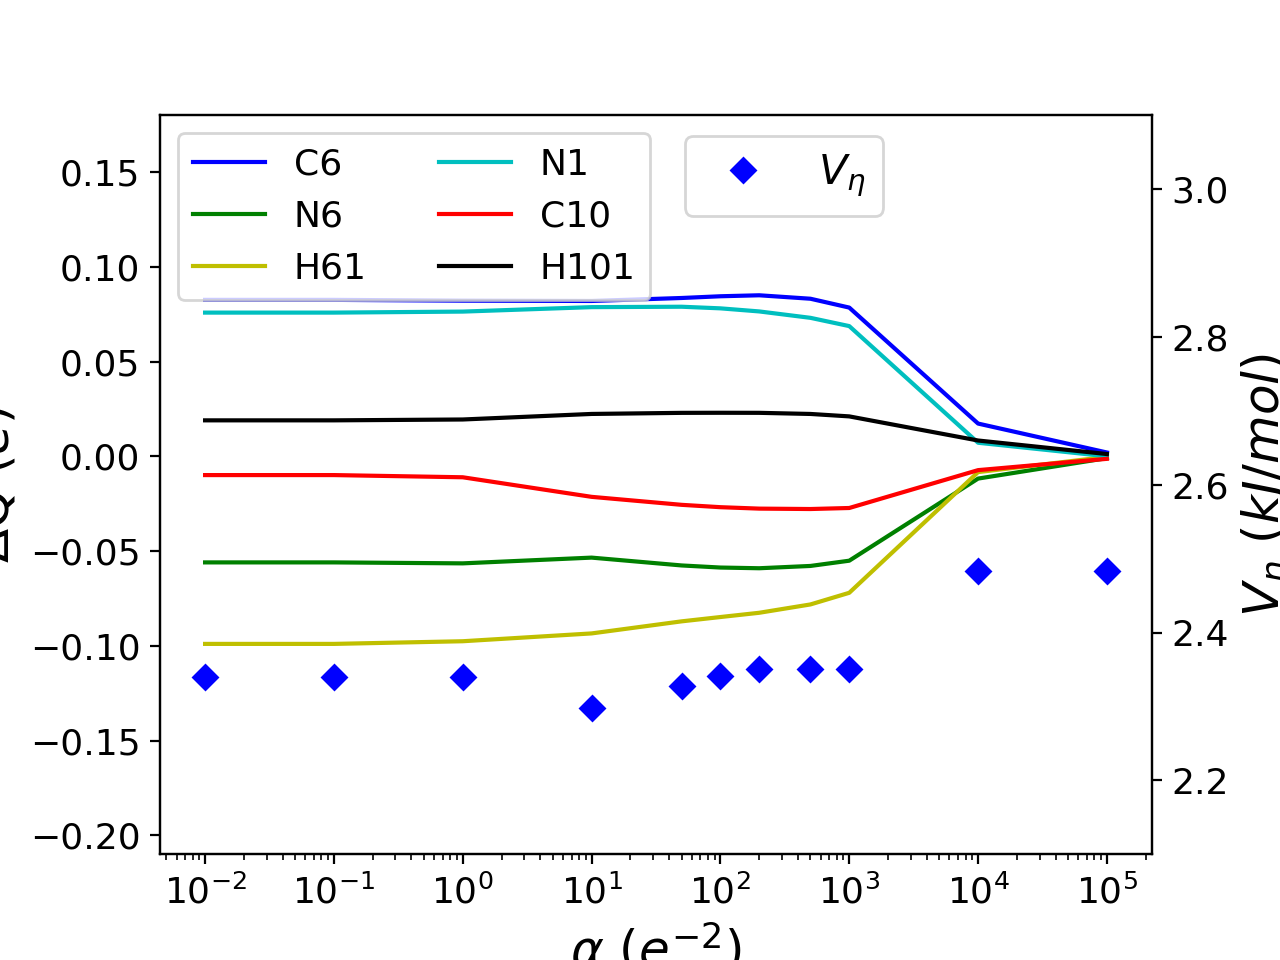

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(19.20,10.80))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, q0, color='b', label='C6')
ax1.plot(Al, q1, color='g', label='N6')
ax1.plot(Al, q2, color='y', label='H61')
ax1.plot(Al, q3, color='c', label='N1')
ax1.plot(Al, q4, color='r', label='C10')
ax1.plot(Al, q5, color='k', label='H101')
ax1.set_ylim([-0.11,0.15])
#ax2.set_ylim([1.3,2.9])


ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.plot(Al, tor, 'D', color='b', label=r'$V_{\eta}$')
ax1.set_xscale('log')
#plt.set_xlabel('log(Alpha)', fontsize=15)
#plt.ylabel('lambda value', fontsize=15)
#ax1.set_title('A <-> m6A replicas distribution', fontsize  =15 )
ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\Delta$Q ($e$)', fontsize  =18)
ax2.set_ylabel(r'$V_{\eta}$ ($kJ/mol$)', fontsize  =18)
ax2.set_ylim(2.1,3.1)
ax1.set_ylim(-0.21,0.18)
ax1.legend(loc='upper left', fontsize=13, ncol=2)
ax2.legend(bbox_to_anchor=(0.75, 1.0), fontsize=15)
plt.savefig('fit6_AC_params.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


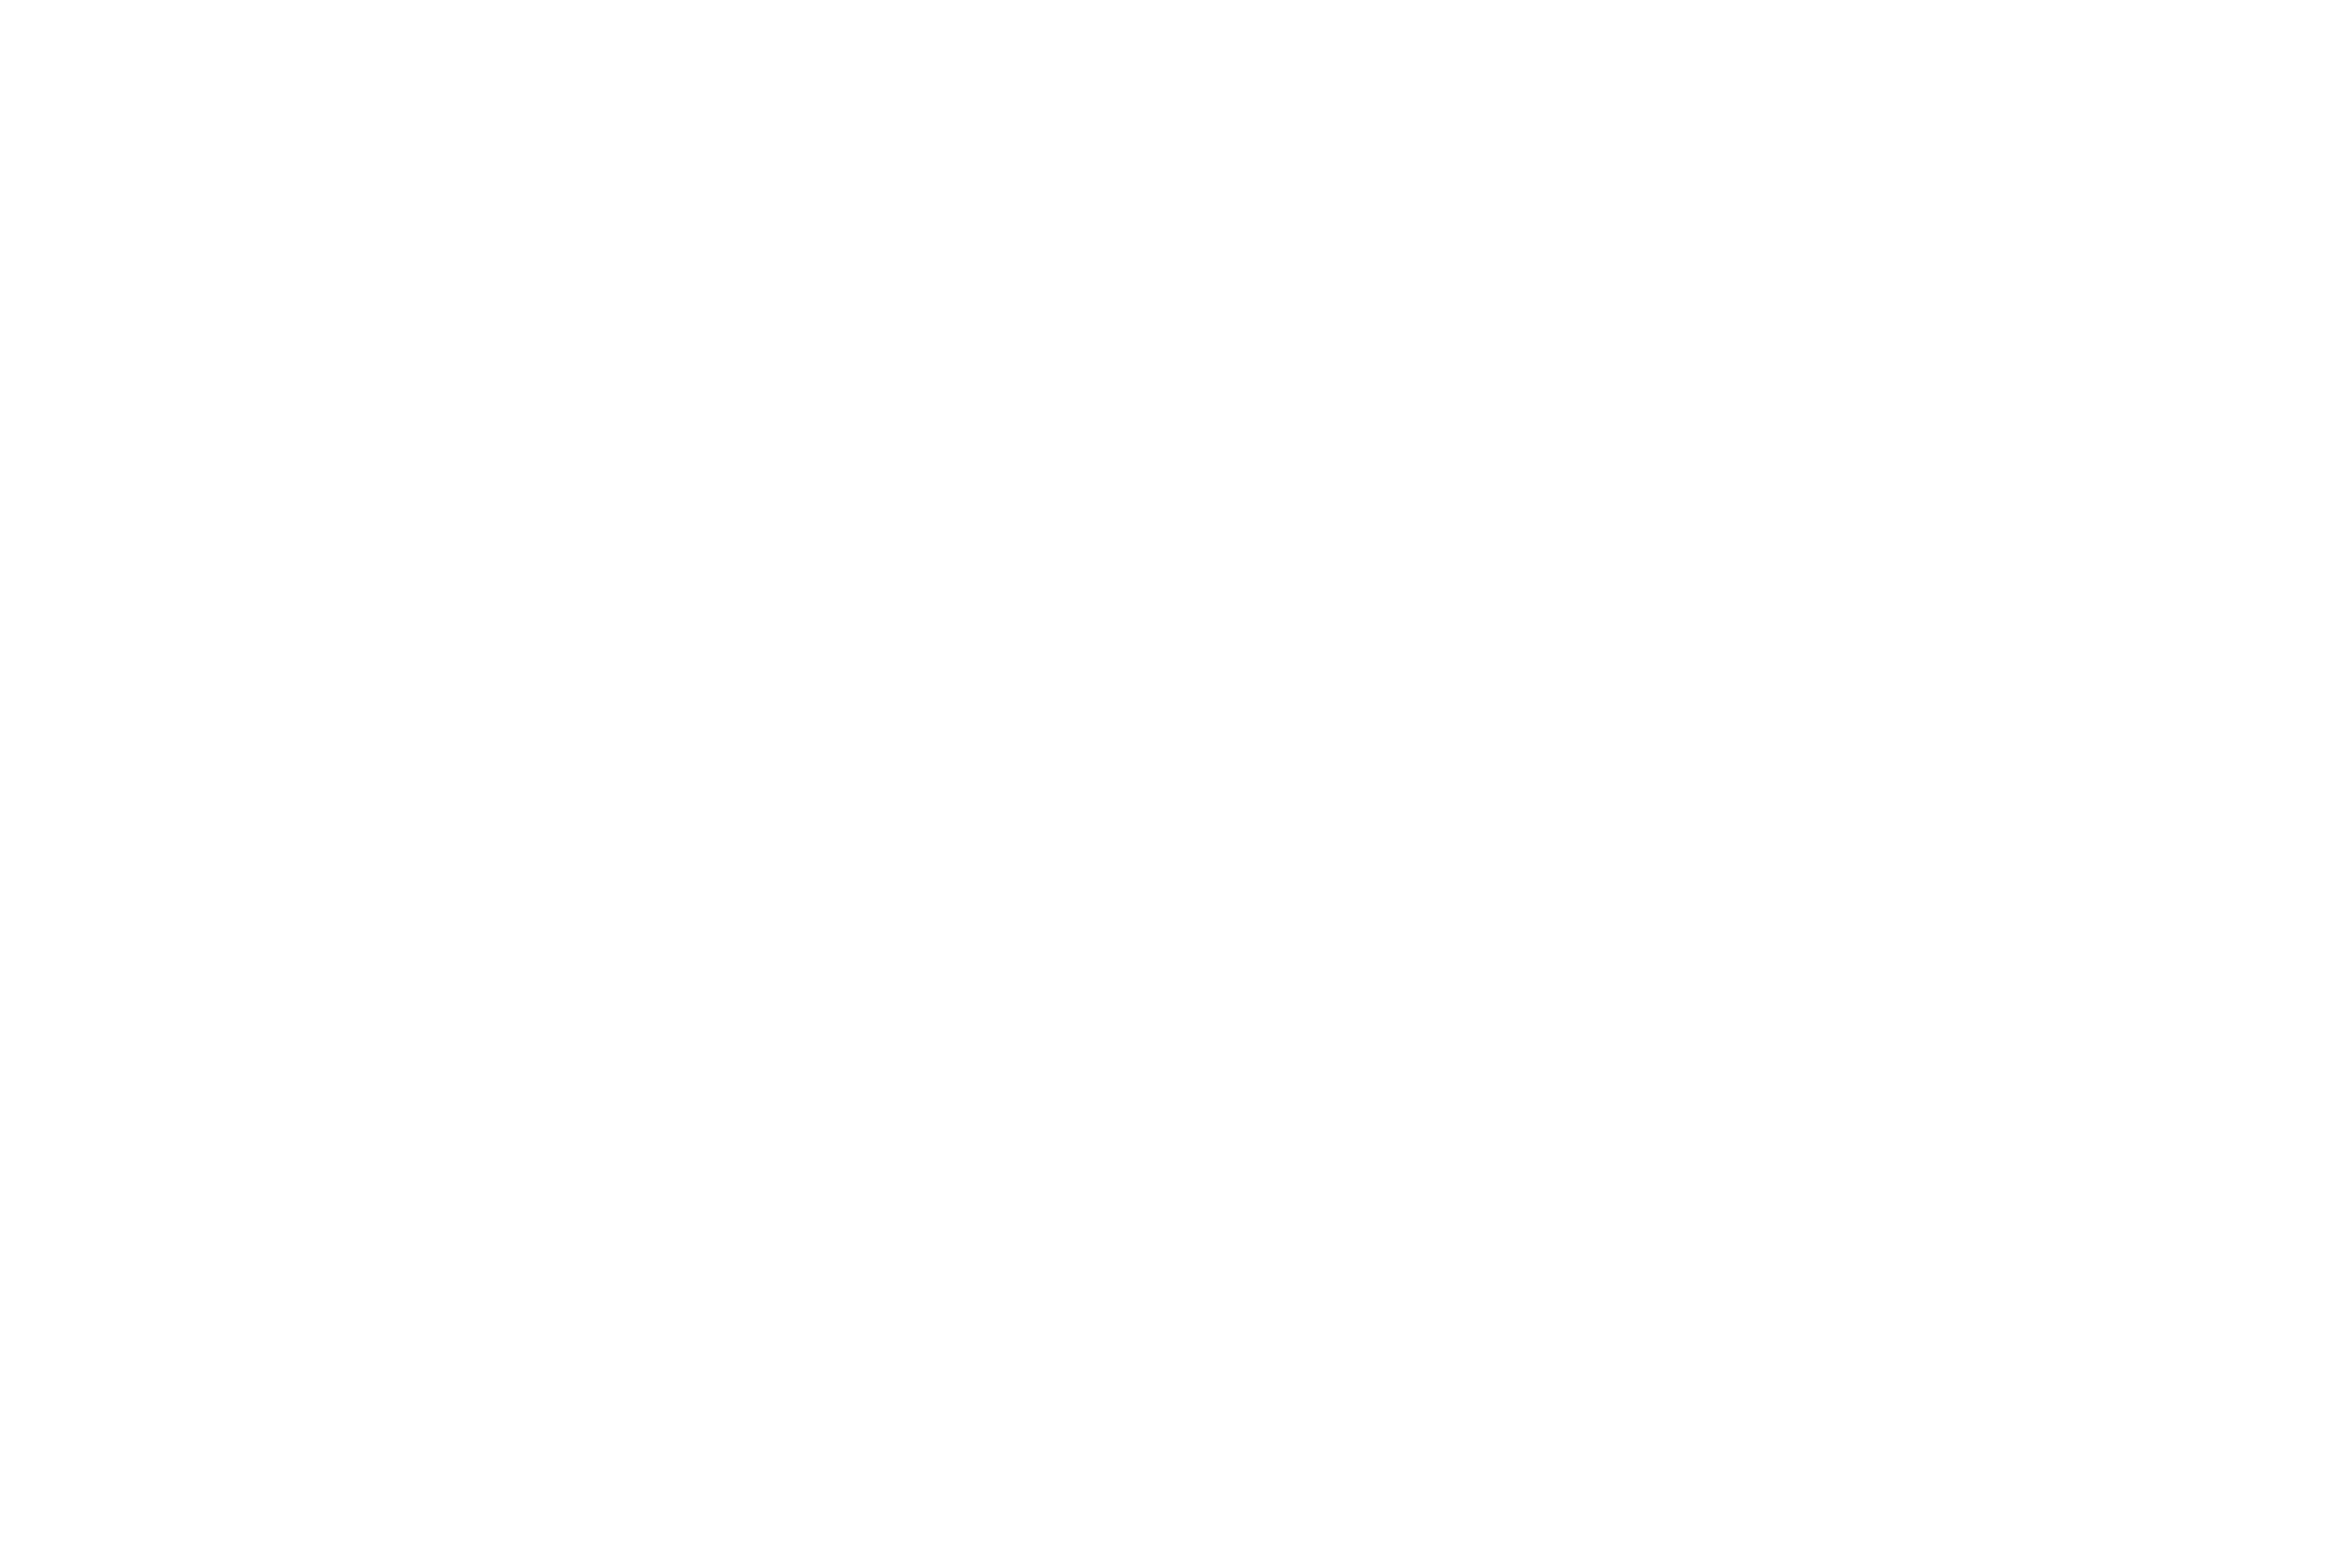

<IPython.core.display.Javascript object>


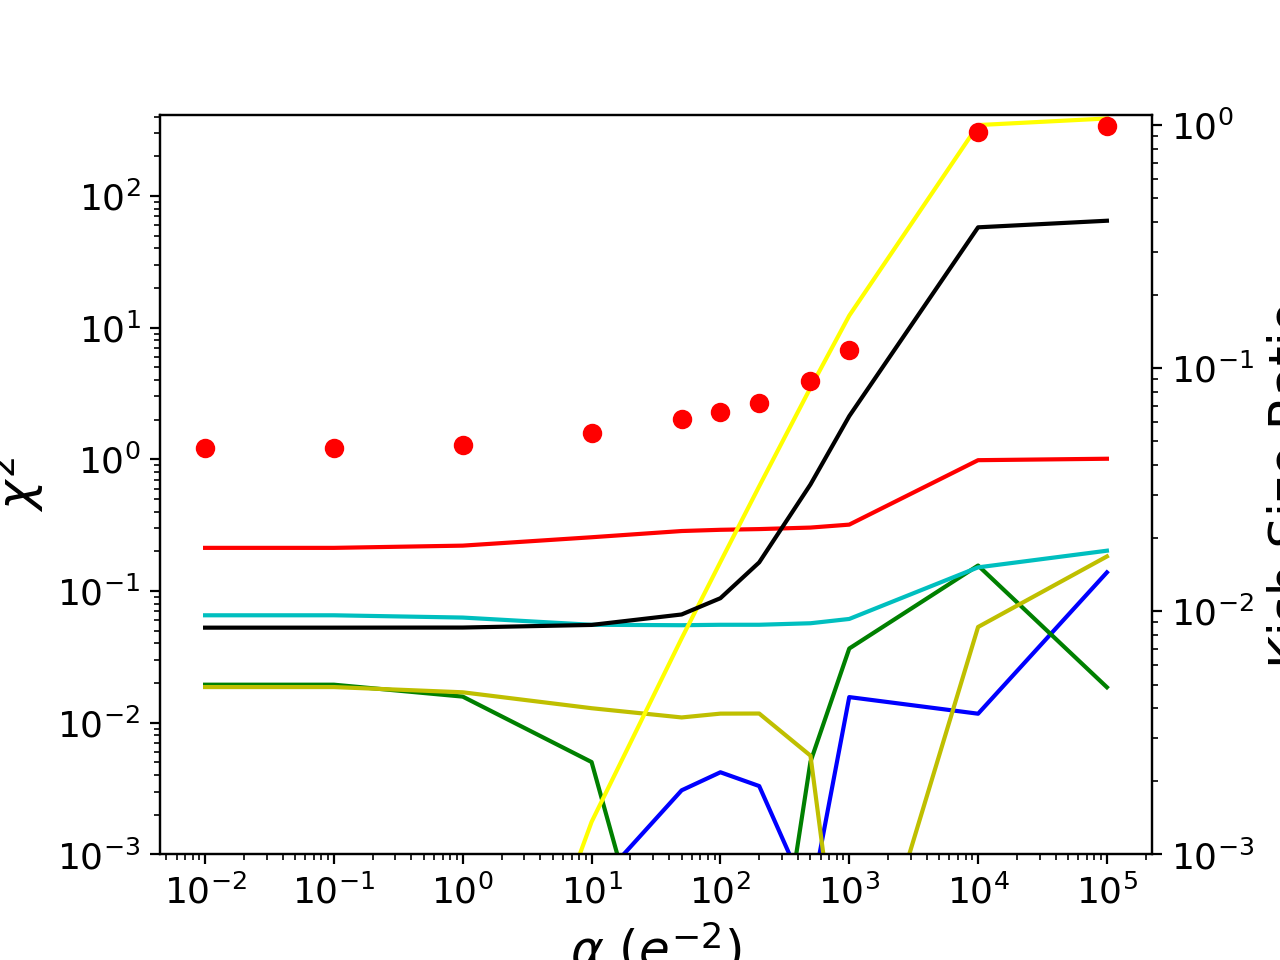

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, x1, color='b', label='A1')
ax1.plot(Al, x2, color='g', label='A2')
ax1.plot(Al, x3, color='y', label='A3')
ax1.plot(Al, x4, color='c', label='A4')
ax1.plot(Al, x5, color='r', label='A5')
ax1.plot(Al, x6, color='yellow', label='C1')
ax1.plot(Al, summ, color='k', label='average')

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
#ax2.set_ylim([0.0006,1.3])

ax2.plot(Al, ksr, 'o', color='r', label=r'KSR')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
#plt.set_xlabel('log(Alpha)', fontsize=15)
#plt.ylabel('lambda value', fontsize=15)
#ax1.set_title('A <-> m6A replicas distribution', fontsize  =15 )
ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\chi ^2$', fontsize  =18)
ax2.set_ylabel('Kish Size Ratio', fontsize  =18)
ax2.set_ylim(0.001,1.1)
ax1.set_ylim(0.001,410)
#ax1.legend(loc='upper left', fontsize=13, frameon=False)
#ax2.legend(loc='upper center', fontsize=16)
plt.savefig('fit6_AC_chi.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


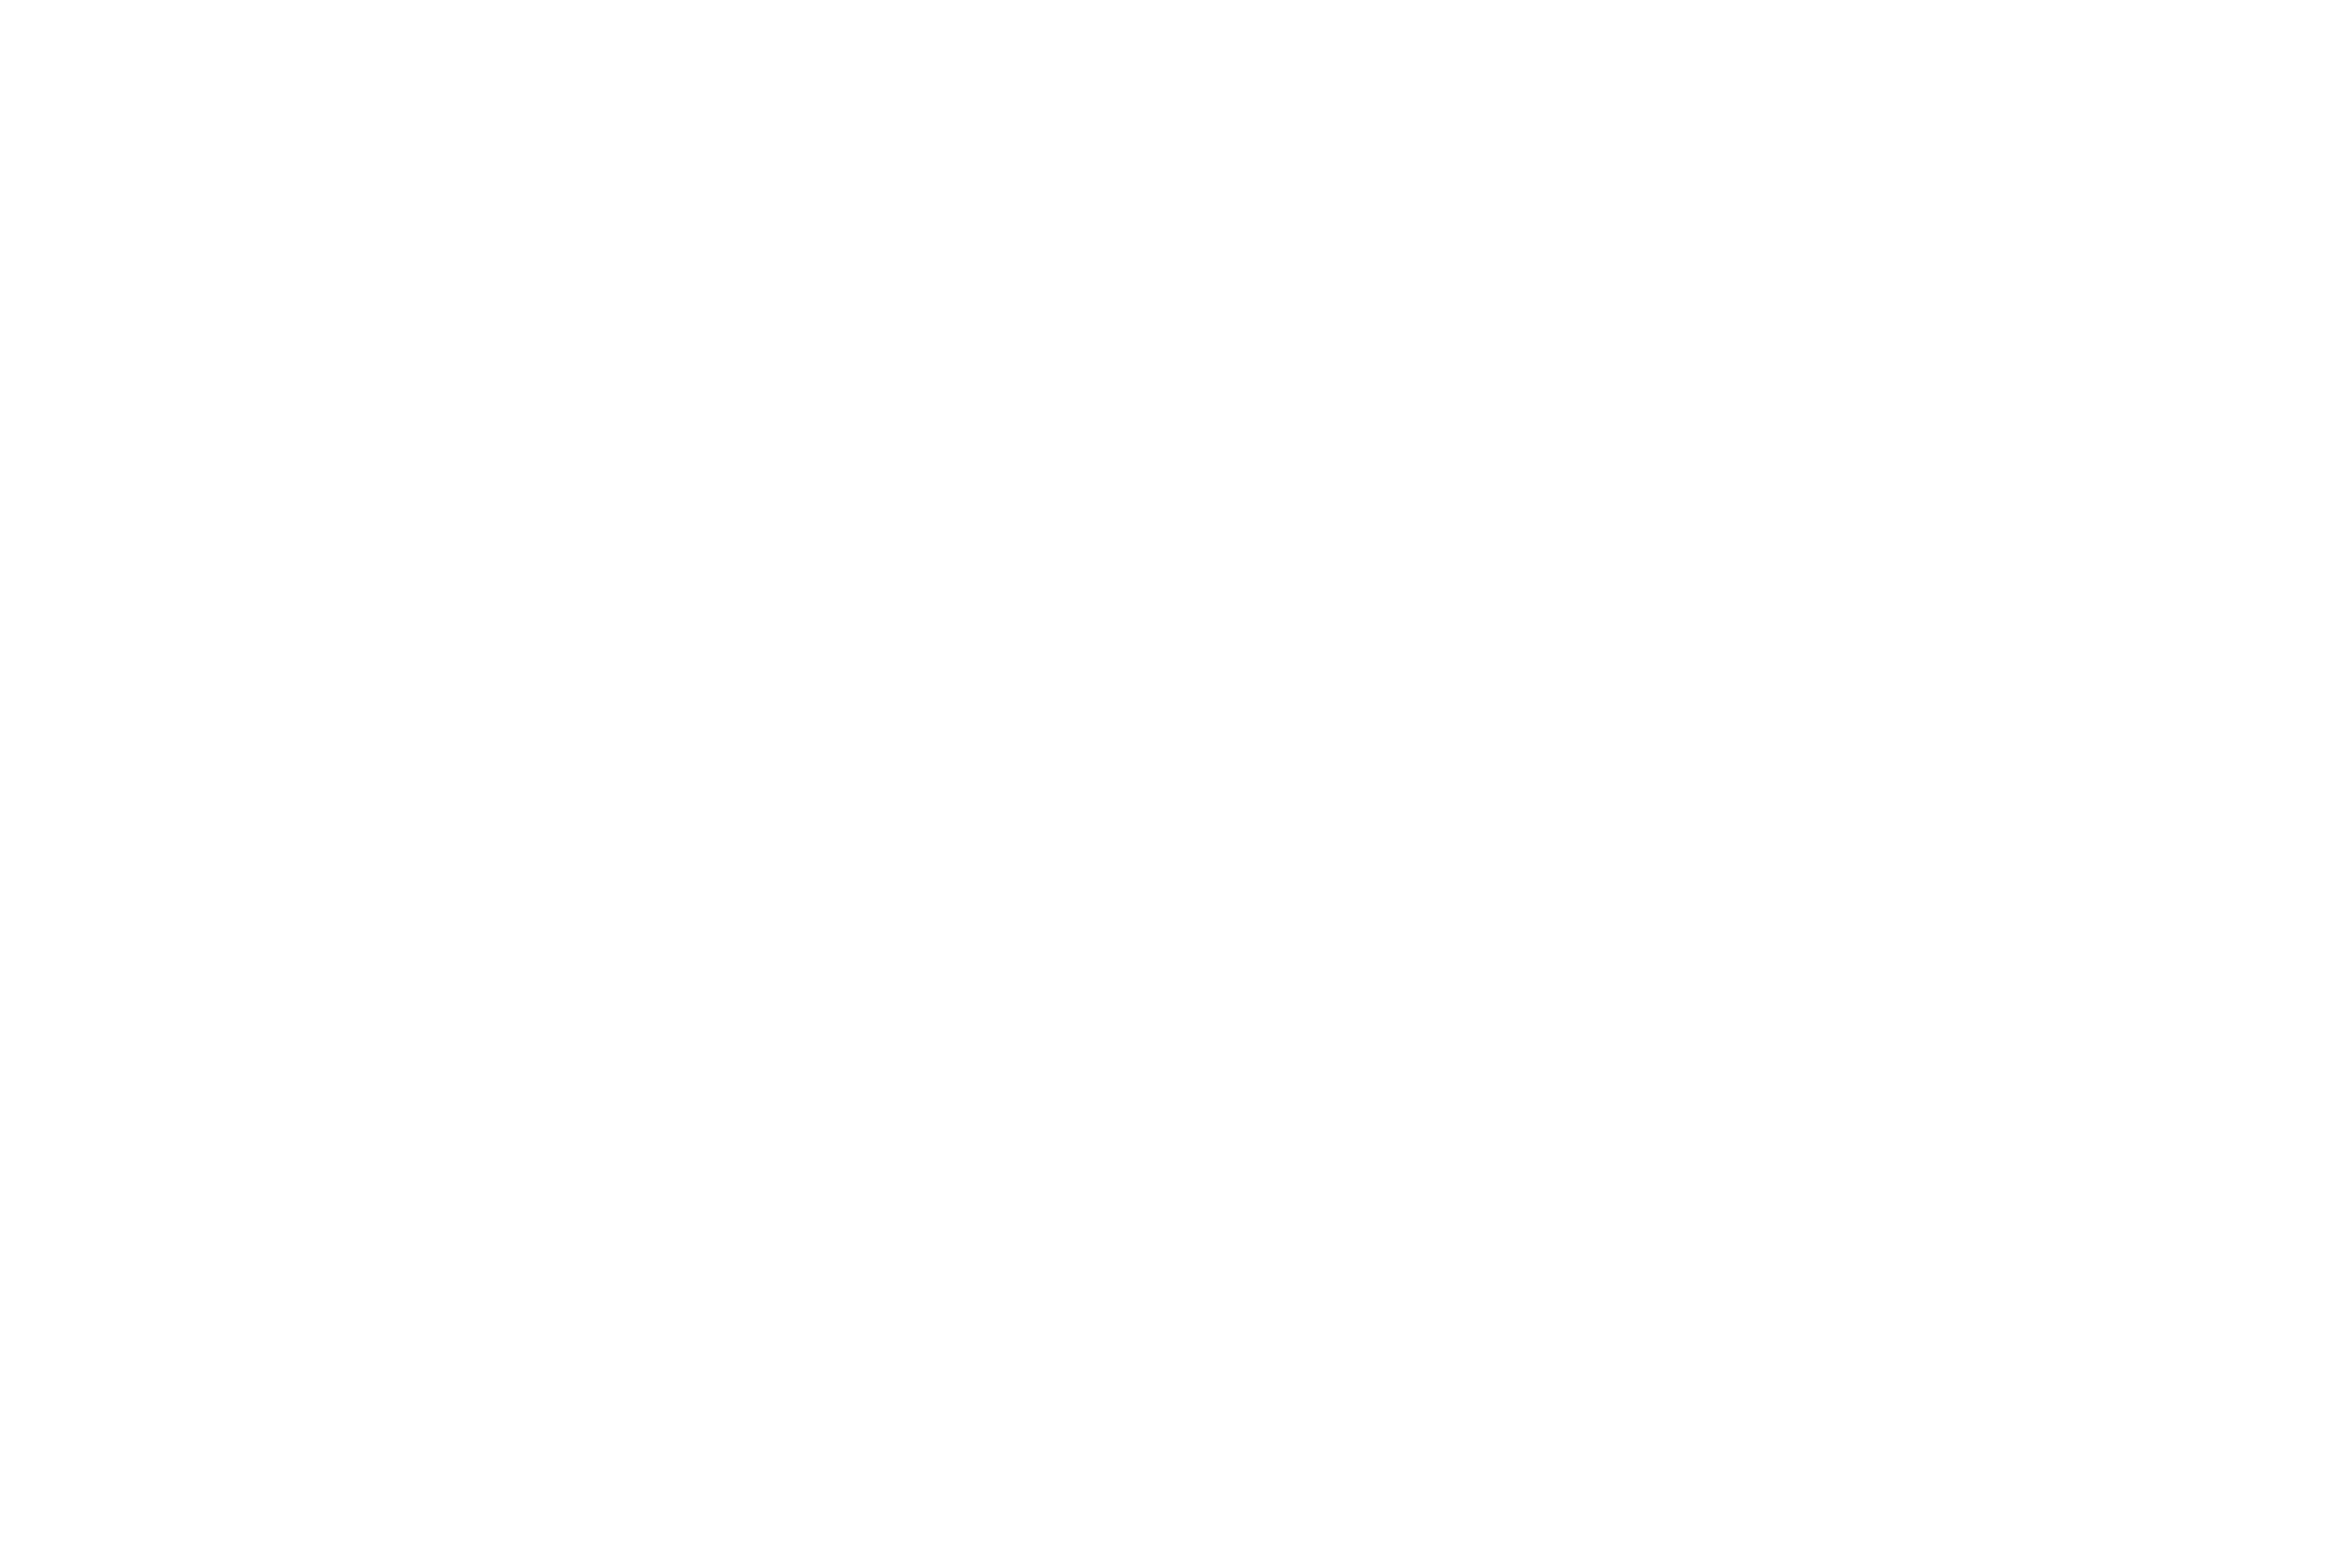

<IPython.core.display.Javascript object>


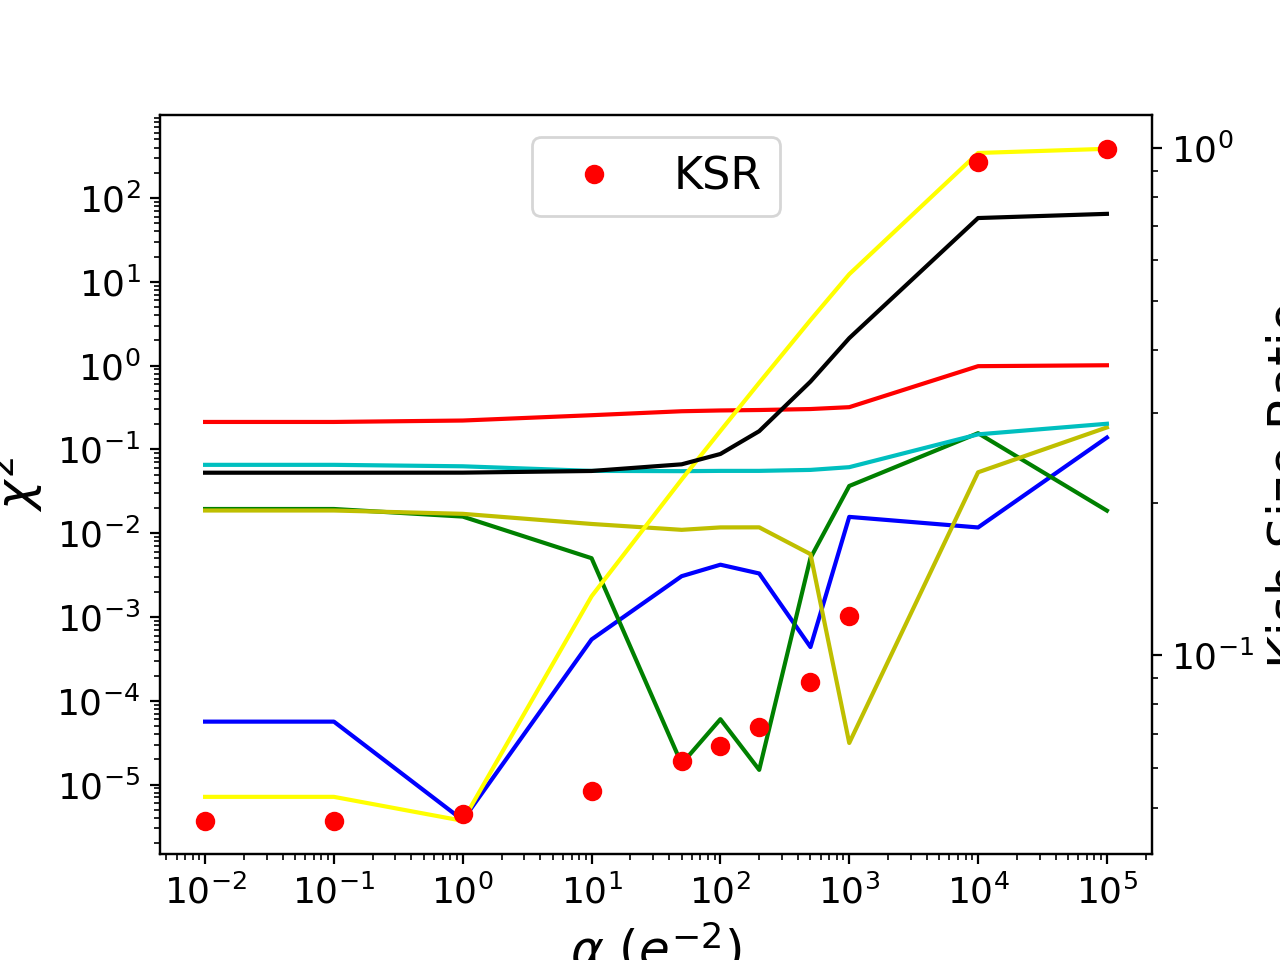

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, x1, color='b', label='A1')
ax1.plot(Al, x2, color='g', label='A2')
ax1.plot(Al, x3, color='y', label='A3')
ax1.plot(Al, x4, color='c', label='A4')
ax1.plot(Al, x5, color='r', label='A5')
ax1.plot(Al, x6, color='yellow', label='C1')
ax1.plot(Al, summ, color='k', label='average')

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
#ax2.set_ylim([0.0006,1.3])

ax2.plot(Al, ksr, 'o', color='r', label=r'KSR')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
#plt.set_xlabel('log(Alpha)', fontsize=15)
#plt.ylabel('lambda value', fontsize=15)
#ax1.set_title('A <-> m6A replicas distribution', fontsize  =15 )
ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\chi ^2$', fontsize  =18)
ax2.set_ylabel('Kish Size Ratio', fontsize  =18)
#ax2.set_ylim(0.001,1.1)
#ax1.set_ylim(0.001,410)
#ax1.legend(fontsize=9, frameon=False, ncol=7, bbox_to_anchor=[1.1, 1.1])
ax2.legend(loc='upper center', fontsize=16)
#plt.savefig('fit6_AC_chi.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

In [59]:
lista

[(0.01,
  array([-0.0559422 , -0.09893958,  0.07584857, -0.00987156,  0.01900461,
          2.34024027])),
 (0.1,
  array([-0.0559422 , -0.09893958,  0.07584857, -0.00987156,  0.01900461,
          2.34024027])),
 (1,
  array([-0.05645023, -0.09753559,  0.076384  , -0.01102819,  0.01945762,
          2.34026276])),
 (10,
  array([-0.0534181 , -0.09341251,  0.07873455, -0.02135536,  0.02238533,
          2.29751887])),
 (50,
  array([-0.05755129, -0.0870429 ,  0.07894895, -0.02556904,  0.02295804,
          2.3278642 ])),
 (100,
  array([-0.0586567 , -0.08476415,  0.07809383, -0.02681194,  0.02300192,
          2.34164806])),
 (200,
  array([-0.05902592, -0.08252258,  0.07647123, -0.02756852,  0.022971  ,
          2.35109039])),
 (500,
  array([-0.05781204, -0.07812087,  0.07308799, -0.02778016,  0.02237857,
          2.35110356])),
 (1000,
  array([-0.05504225, -0.07197946,  0.06872991, -0.02723952,  0.02109355,
          2.35108098])),
 (10000,
  array([-0.01171949, -0.00830052,  0.0

Load files for validation data set

In [72]:
W0b=[]
app=np.load("../AFEC/A2_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../AFEC/A2_dup_syn_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B1_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B1_ss_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B2_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B2_ss_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B3_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B3_ss_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B4_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B4_ss_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B5_dup_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))
app=np.load("../Kierzek_AFEC/B5_ss_fitA/ReplicaEx/logW.npy")
W0b.append(np.exp(app))

In [73]:
dEb=[]
app=np.load("../AFEC/A2_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../AFEC/A2_dup_syn_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B1_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B1_ss_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B2_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B2_ss_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B3_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B3_ss_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B4_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B4_ss_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B5_dup_fitA/ReplicaEx/DeE.npy")
dEb.append((app))
app=np.load("../Kierzek_AFEC/B5_ss_fitA/ReplicaEx/DeE.npy")
dEb.append((app))

In [74]:
Trb=[]
app=np.load("../AFEC/A2_dup_fitA/charges_Rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../AFEC/A2_dup_syn_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B1_dup_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B1_ss_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B2_dup_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B2_ss_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B3_dup_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B3_ss_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B4_dup_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B4_ss_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B5_dup_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))
app=np.load("../Kierzek_AFEC/B5_ss_fitA/charges_rerun/Trans_vectors.npy")
Trb.append((app))

In [75]:
eta6b=[]
eta6bb=[]
app=np.loadtxt("../AFEC/A2_dup_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../AFEC/A2_dup_syn_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B1_dup_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B1_ss_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B2_dup_fitA/COLVAR")
eta6b.append(app[:,1])
eta6bb.append(app[:,2])
app=np.loadtxt("../Kierzek_AFEC/B2_ss_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B3_dup_fitA/COLVAR")
eta6b.append(app[:,1])
eta6bb.append(app[:,2])
app=np.loadtxt("../Kierzek_AFEC/B3_ss_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B4_dup_fitA/COLVAR")
eta6b.append(app[:,1])
eta6bb.append(app[:,2])
app=np.loadtxt("../Kierzek_AFEC/B4_ss_fitA/COLVAR")
eta6b.append(app[:,1])
app=np.loadtxt("../Kierzek_AFEC/B5_dup_fitA/COLVAR")
eta6b.append(app[:,1])
eta6bb.append(app[:,2])
app=np.loadtxt("../Kierzek_AFEC/B5_ss_fitA/COLVAR")
eta6b.append(app[:,1])

In [76]:
W0b=np.array(W0b)
dEb=np.array(dEb)
Trb=np.array(Trb)
eta6b=np.array(eta6b)
eta6bb=np.array(eta6bb)



import math
for i in range(len(W0b)):
    dEb[i]-=np.multiply([np.cos(eta6b[i]-math.pi)+1],2.46).reshape(-1)
dEb[10]-=np.multiply([np.cos(eta6bb[0]-math.pi)+1],2.46).reshape(-1)  
dEb[4]-=np.multiply([np.cos(eta6bb[1]-math.pi)+1],2.46).reshape(-1) 
dEb[6]-=np.multiply([np.cos(eta6bb[2]-math.pi)+1],2.46).reshape(-1)  
dEb[8]-=np.multiply([np.cos(eta6bb[3]-math.pi)+1],2.46).reshape(-1) 

    
logZb=np.zeros((12,1))
logZb[:,0]=np.log(W0b.sum(axis=1))

In [77]:
N1metb=2
N2metb=4
Ntotb=N1metb+N2metb
Expb=[-11, 2.5, 2.1,  5.4, 8.6, 1.7]
sigb=np.array([2, 2.1, 1.3, 1.3, 0.8, 1.0])


kbt=2.494
Ncha=6
Tr_size=int((Ncha**2+Ncha-2)/2)

In [78]:
cm.init(max_ones=W0b.shape[1])
cm_Trb=cm.CUDAMatrix(np.array(Trb).reshape(-1,Tr_size))
cm_W0b=cm.CUDAMatrix(np.reshape(np.array(W0b).reshape(-1),(1,-1)))



def validation_cuda(par):
    pen=par[Ncha-1]
    DeQ=par[:Ncha-1]
    DeQ=np.array(DeQ)
    #The sixth parameter correspond to the amplitude of the cosine od the dihedral. 
    lam,DeLDeQ=give_lam(DeQ)

    tors=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(2*Ntotb,-1))
    tors2=(np.array(np.multiply([np.cos(eta6bb[:]-math.pi)+1],pen)).reshape(N2metb,-1))
    
    DeG=[]
    Chi2=[]
    Kish=[]
    
    if USE_CUDA:
        #
        cm.init(max_ones=W0b.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Trb,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntotb,-1)

        for i in range (2*N1metb):
            esp_min=np.min(arrS[i]+dEb[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0b[i])*np.exp(-(1/kbt)*(arrS[i]+dEb[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(kbt)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/kbt)*esp_min-logZb[i][0]))
         
            
        for k in range (2*N2metb):
            i=k+2*N1metb
            if k%2==0:
                #cases in which two methylation occurs. Here I want to compute DeG for methylation, so DeG is divided by two
                
                esp_min=np.min(arrS[i]+dEb[i]+tors[i]+tors2[int(k/2)])
             
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0b[i])*np.exp(-(1/kbt)*(arrS[i]+dEb[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(kbt/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/kbt)*esp_min-logZb[i][0])) 
                cm_we2=cm.CUDAMatrix(np.reshape((np.array(W0b[i])*np.exp(-(1/kbt)*(arrS[i]+dEb[i]+tors[i]+tors2[int(k/2)]-esp_min)))**2,(1,-1)))
                Kish.append((cm_we.sum(axis=1).asarray()[0,0])**2/cm_we2.sum(axis=1).asarray()[0,0])
                
            if k%2==1:
                esp_min=np.min(arrS[i]+dEb[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0b[i])*np.exp(-(1/kbt)*(arrS[i]+dEb[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(kbt)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/kbt)*esp_min-logZb[i][0]))
                
                cm_we2=cm.CUDAMatrix(np.reshape((np.array(W0b[i])*np.exp(-(1/kbt)*(arrS[i]+dEb[i]+tors[i]-esp_min)))**2,(1,-1)))
                Kish.append((cm_we.sum(axis=1).asarray()[0,0])**2/cm_we2.sum(axis=1).asarray()[0,0])
    else:
        print("use Cuda!")

    
    for i in range(Ntotb):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Expb[i])*(DeG[i*2]-DeG[i*2+1]-Expb[i])/(sigb[i]*sigb[i]))
          
    
    print("Chi2:",Chi2)
    print("DeG", DeG)
    print("KIsh", Kish)
    
    return np.array(Chi2),np.array(DeG),np.array(Kish)

In [80]:
ksr_b=[]
for i in range(len(lista)):
      app=validation_cuda(lista[i][1])[2]
Kish0b=np.mean(validation_cuda(np.zeros(6))[2])


Chi2: [12.65213811390709, 3.269795936517864, 25.570725125239537, 0.5596616583072034, 4.0463947294320874, 91.8393015323139]
DeG [263.61524671855636, 267.50127789267384, 267.81483303826315, 261.51749185263816, 270.65633442793296, 261.9825588414336, 268.3989971290716, 262.02646013618175, 272.488450724934, 262.2791985300197, 270.0823159723165, 258.7990335736645]
KIsh [691.3609753876128, 492.6657511954358, 501.8104812884009, 611.9640588219713, 315.0927689832685, 600.023460306466, 228.66713150790753, 735.3105666418238]
Chi2: [12.65213811390709, 3.269795936517864, 25.570725125239537, 0.5596616583072034, 4.0463947294320874, 91.8393015323139]
DeG [263.61524671855636, 267.50127789267384, 267.81483303826315, 261.51749185263816, 270.65633442793296, 261.9825588414336, 268.3989971290716, 262.02646013618175, 272.488450724934, 262.2791985300197, 270.0823159723165, 258.7990335736645]
KIsh [691.3609753876128, 492.6657511954358, 501.8104812884009, 611.9640588219713, 315.0927689832685, 600.023460306466, 2

In [81]:
CV=[]
for i in range(len(lista)):
    CV.append((lista[i][0] , np.mean(chis(lista[i][1])[0]) ,np.mean(validation_cuda(lista[i][1])[0]), (np.mean(chis(lista[i][1])[0])+np.mean(validation_cuda(lista[i][1])[0]))/2, np.mean(validation_cuda(lista[i][1])[2])/Kish0b )) 

Chi2: [12.65213811390709, 3.269795936517864, 25.570725125239537, 0.5596616583072034, 4.0463947294320874, 91.8393015323139]
DeG [263.61524671855636, 267.50127789267384, 267.81483303826315, 261.51749185263816, 270.65633442793296, 261.9825588414336, 268.3989971290716, 262.02646013618175, 272.488450724934, 262.2791985300197, 270.0823159723165, 258.7990335736645]
KIsh [691.3609753876128, 492.6657511954358, 501.8104812884009, 611.9640588219713, 315.0927689832685, 600.023460306466, 228.66713150790753, 735.3105666418238]
Chi2: [12.65213811390709, 3.269795936517864, 25.570725125239537, 0.5596616583072034, 4.0463947294320874, 91.8393015323139]
DeG [263.61524671855636, 267.50127789267384, 267.81483303826315, 261.51749185263816, 270.65633442793296, 261.9825588414336, 268.3989971290716, 262.02646013618175, 272.488450724934, 262.2791985300197, 270.0823159723165, 258.7990335736645]
KIsh [691.3609753876128, 492.6657511954358, 501.8104812884009, 611.9640588219713, 315.0927689832685, 600.023460306466, 2

Chi2: [12.2377087000521, 3.4131636710270175, 26.231705922353573, 0.5952345828774287, 4.807973151734807, 99.41919242763156]
DeG [266.57615886237227, 270.57967154370954, 270.9788733292614, 264.59917594554327, 273.8376700106711, 265.079473332232, 271.4829398336116, 265.0799710180132, 275.6912731767402, 265.33710590503824, 273.41304830832155, 261.7421309770209]
KIsh [969.0011391921203, 795.1894296837897, 731.9085134347188, 856.617339748646, 495.20166216853306, 784.8161873362442, 439.1050510811622, 946.9493376989898]
Chi2: [12.2377087000521, 3.4131636710270175, 26.231705922353573, 0.5952345828774287, 4.807973151734807, 99.41919242763156]
DeG [266.57615886237227, 270.57967154370954, 270.9788733292614, 264.59917594554327, 273.8376700106711, 265.079473332232, 271.4829398336116, 265.0799710180132, 275.6912731767402, 265.33710590503824, 273.41304830832155, 261.7421309770209]
KIsh [969.0011391921203, 795.1894296837897, 731.9085134347188, 856.617339748646, 495.20166216853306, 784.8161873362442, 43

Chi2: [0.07058929594091244, 0.7076351212504352, 10.574685220757566, 1.9260389221943657, 1.2062924469393224, 25.128182104831307]
DeG [209.42277956068824, 219.89140663724967, 210.74774531089042, 206.48120324099386, 213.7276922517353, 207.4002559100407, 211.44001831423128, 207.84418177093593, 215.5487491592639, 207.82739992381212, 213.1550926315593, 206.44229080974037]
KIsh [13798.794693425178, 18903.67793809619, 13747.543158343797, 14643.653691713786, 14091.869570413925, 14658.38168179019, 13213.479906561292, 14956.997388908676]


<IPython.core.display.Javascript object>


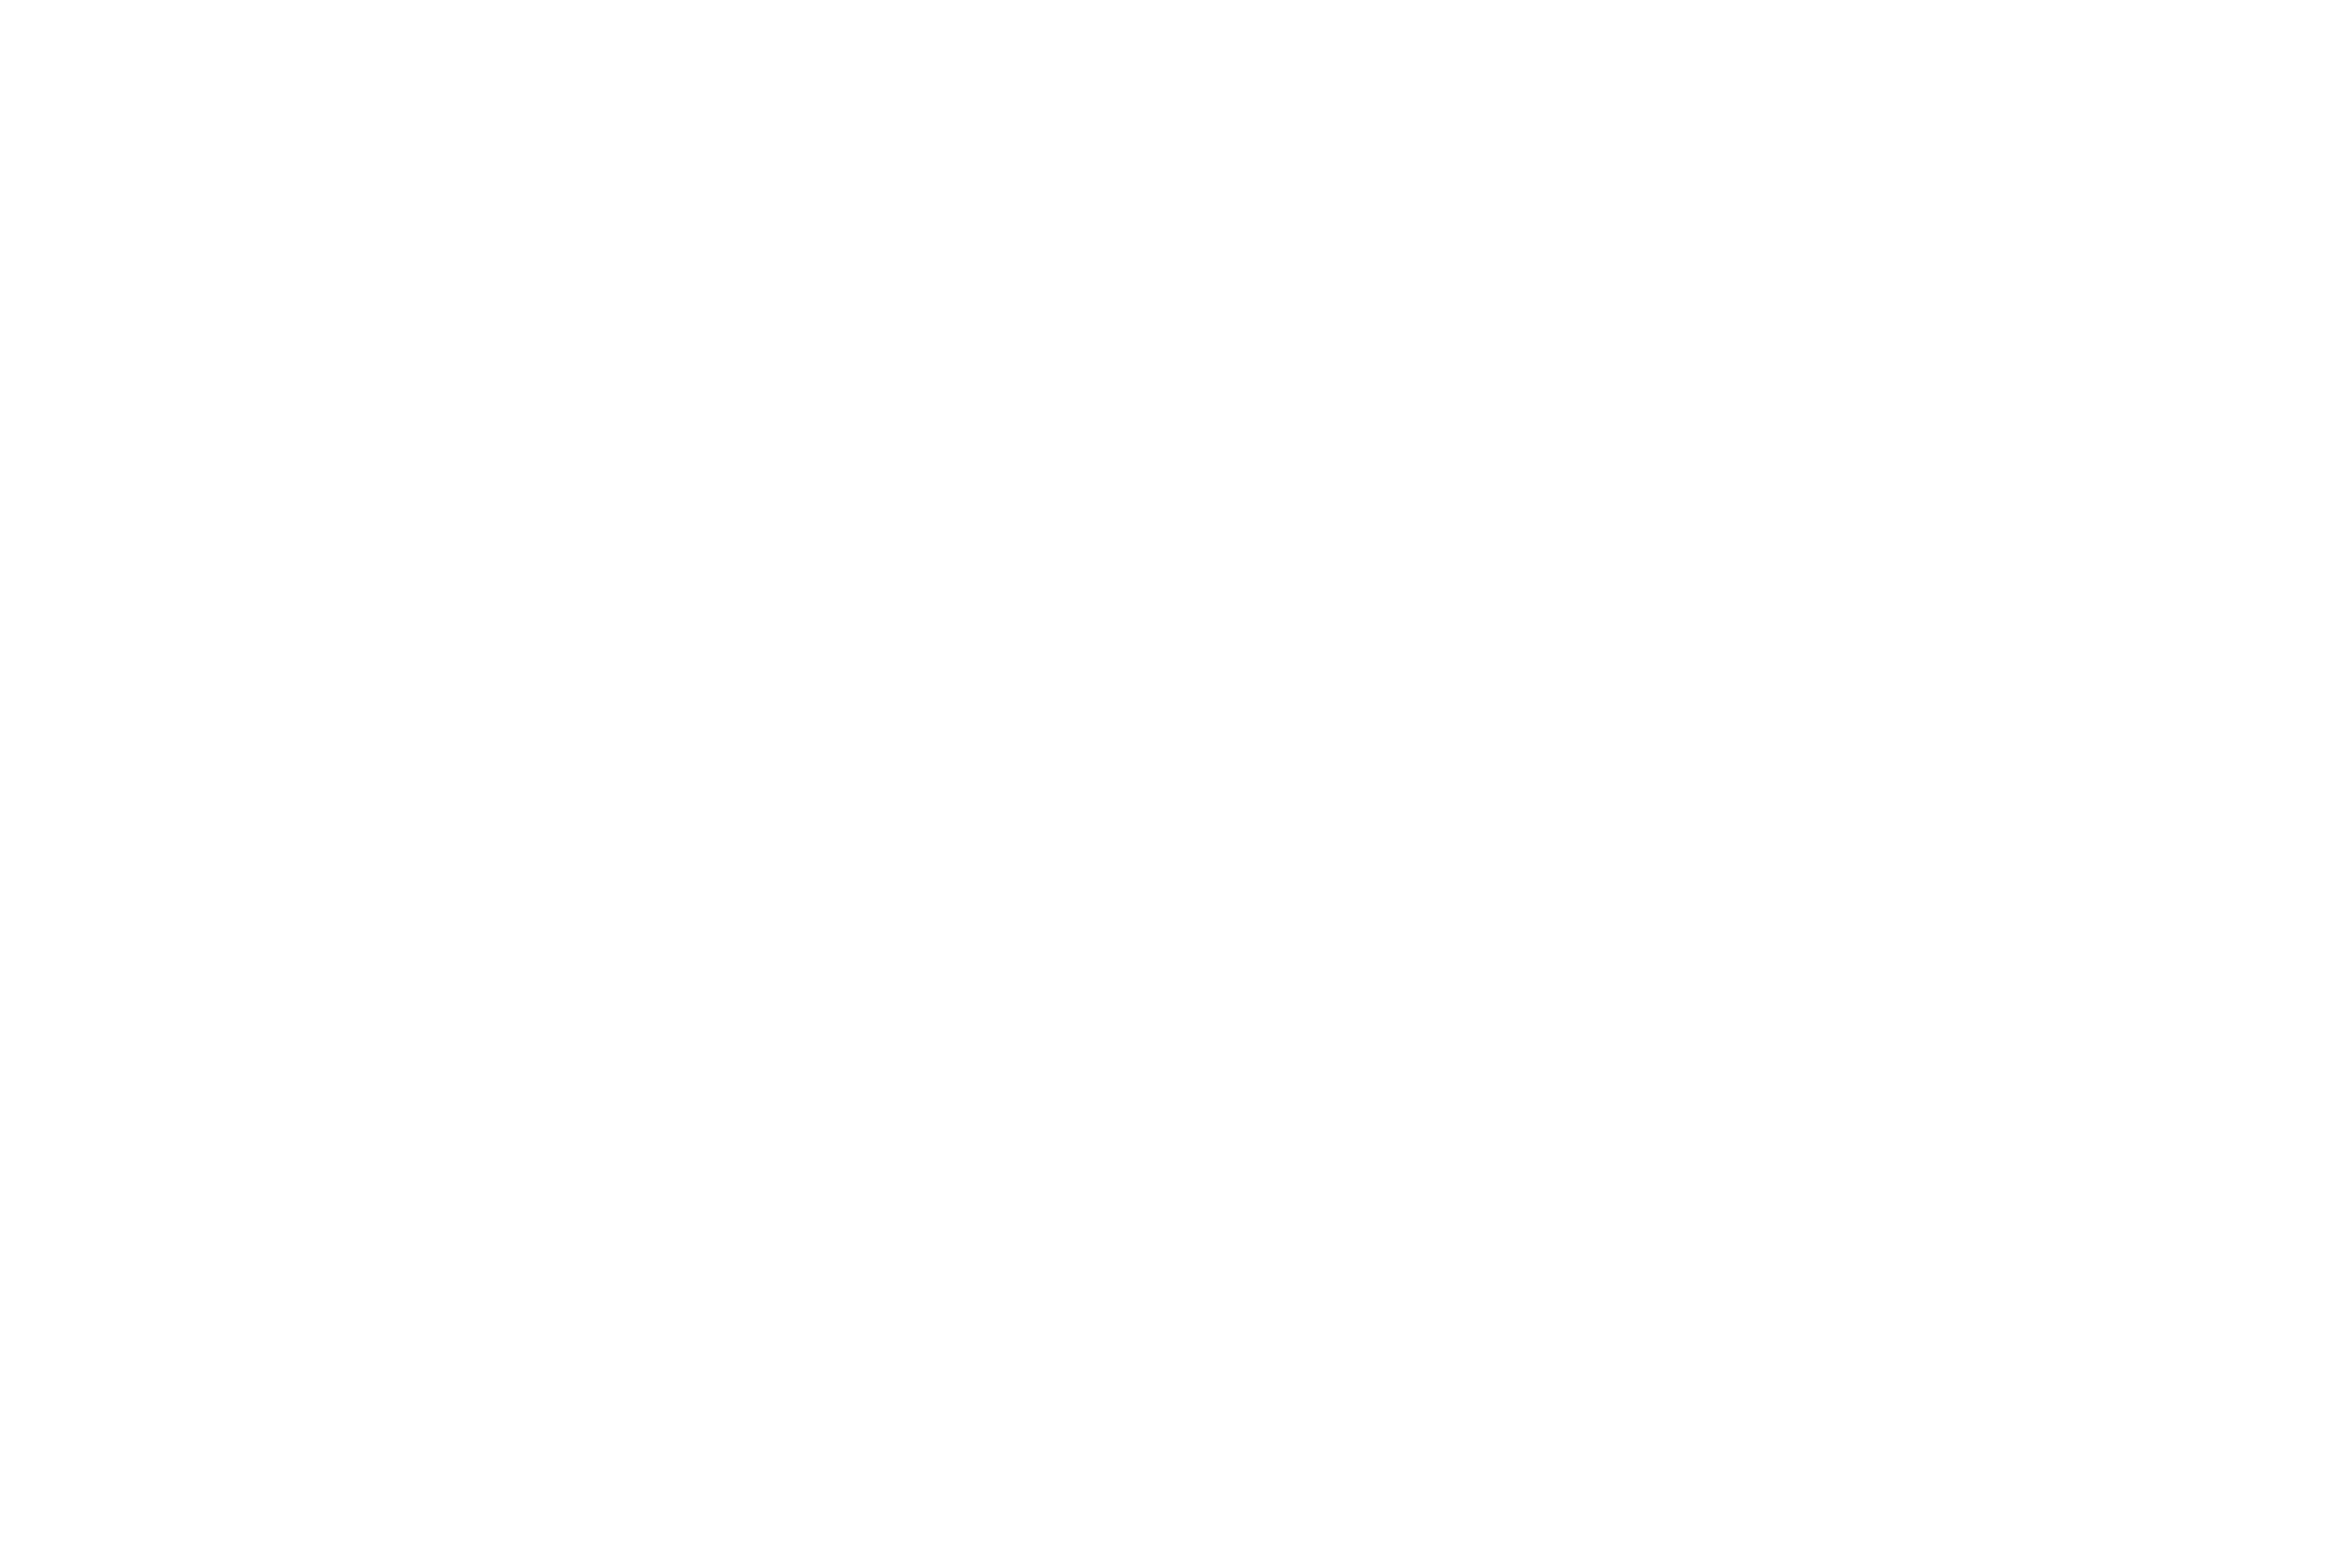

<IPython.core.display.Javascript object>


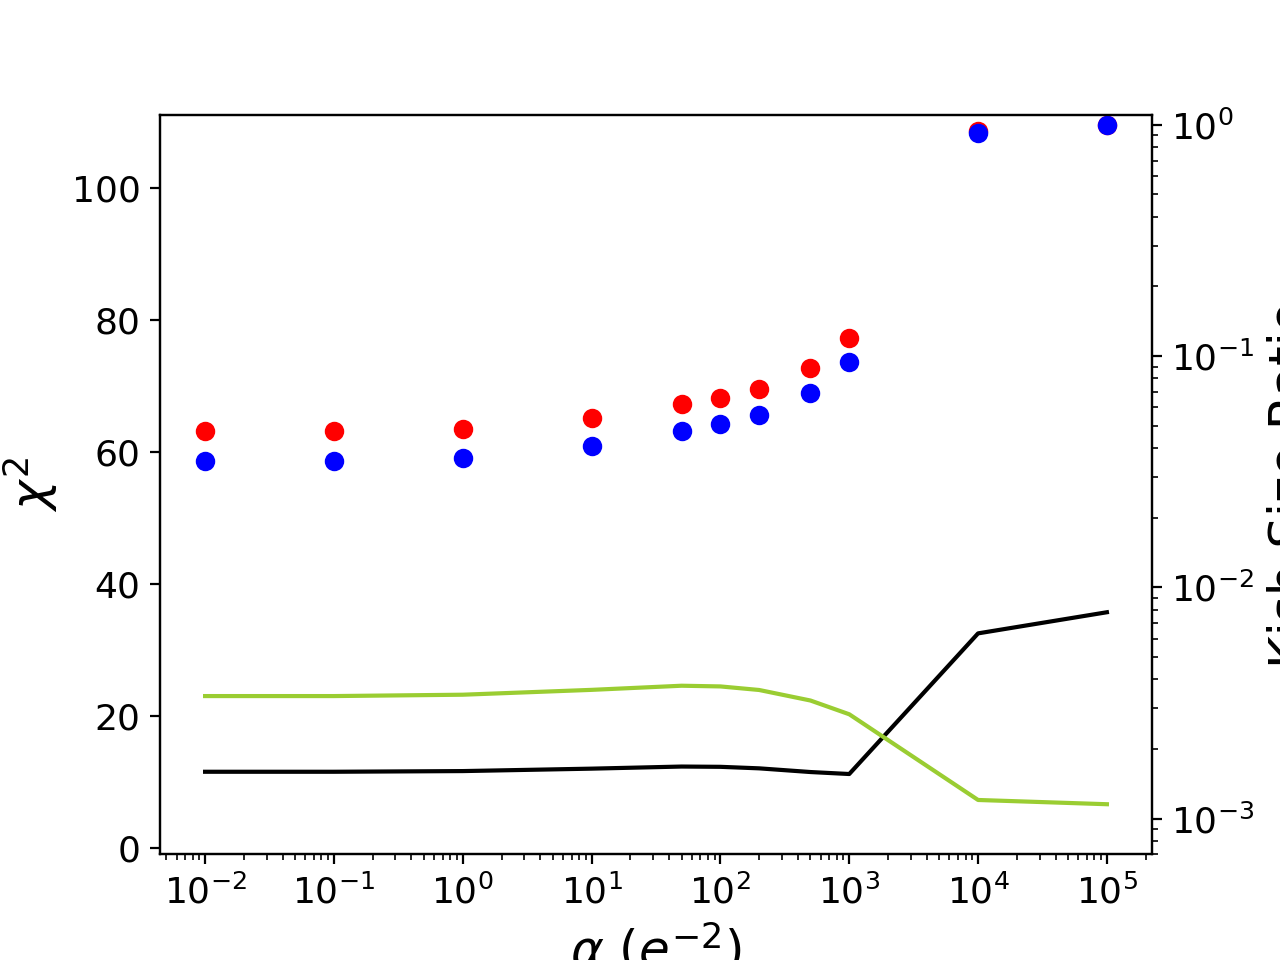

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, np.array(CV)[:,3], color='black', label=r'$\chi ^2$ total data set ')
ax1.plot(Al, np.array(CV)[:,2], color='yellowgreen', label=r'$\chi ^2$ BA2 ')

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
#ax2.set_ylim([0.0006,1.3])

ax2.plot(Al, ksr, 'o', color='r', label=r'KSR AC')
ax2.plot(Al, np.array(CV)[:,4] , 'o', color='b', label=r'KSR BA2')
ax1.set_xscale('log')
ax2.set_yscale('log')
#plt.set_xlabel('log(Alpha)', fontsize=15)
#plt.ylabel('lambda value', fontsize=15)
#ax1.set_title('A <-> m6A replicas distribution', fontsize  =15 )
ax1.set_ylim(-1,111)
ax2.set_ylim(0.0007,1.1)
ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\chi ^2$', fontsize  =18)
ax2.set_ylabel('Kish Size Ratio', fontsize  =18)
#ax2.set_ylim(0,100)
#ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.76), fontsize=15, frameon=False)
#ax2.legend(loc='upper left', fontsize=18)
plt.savefig('civa.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


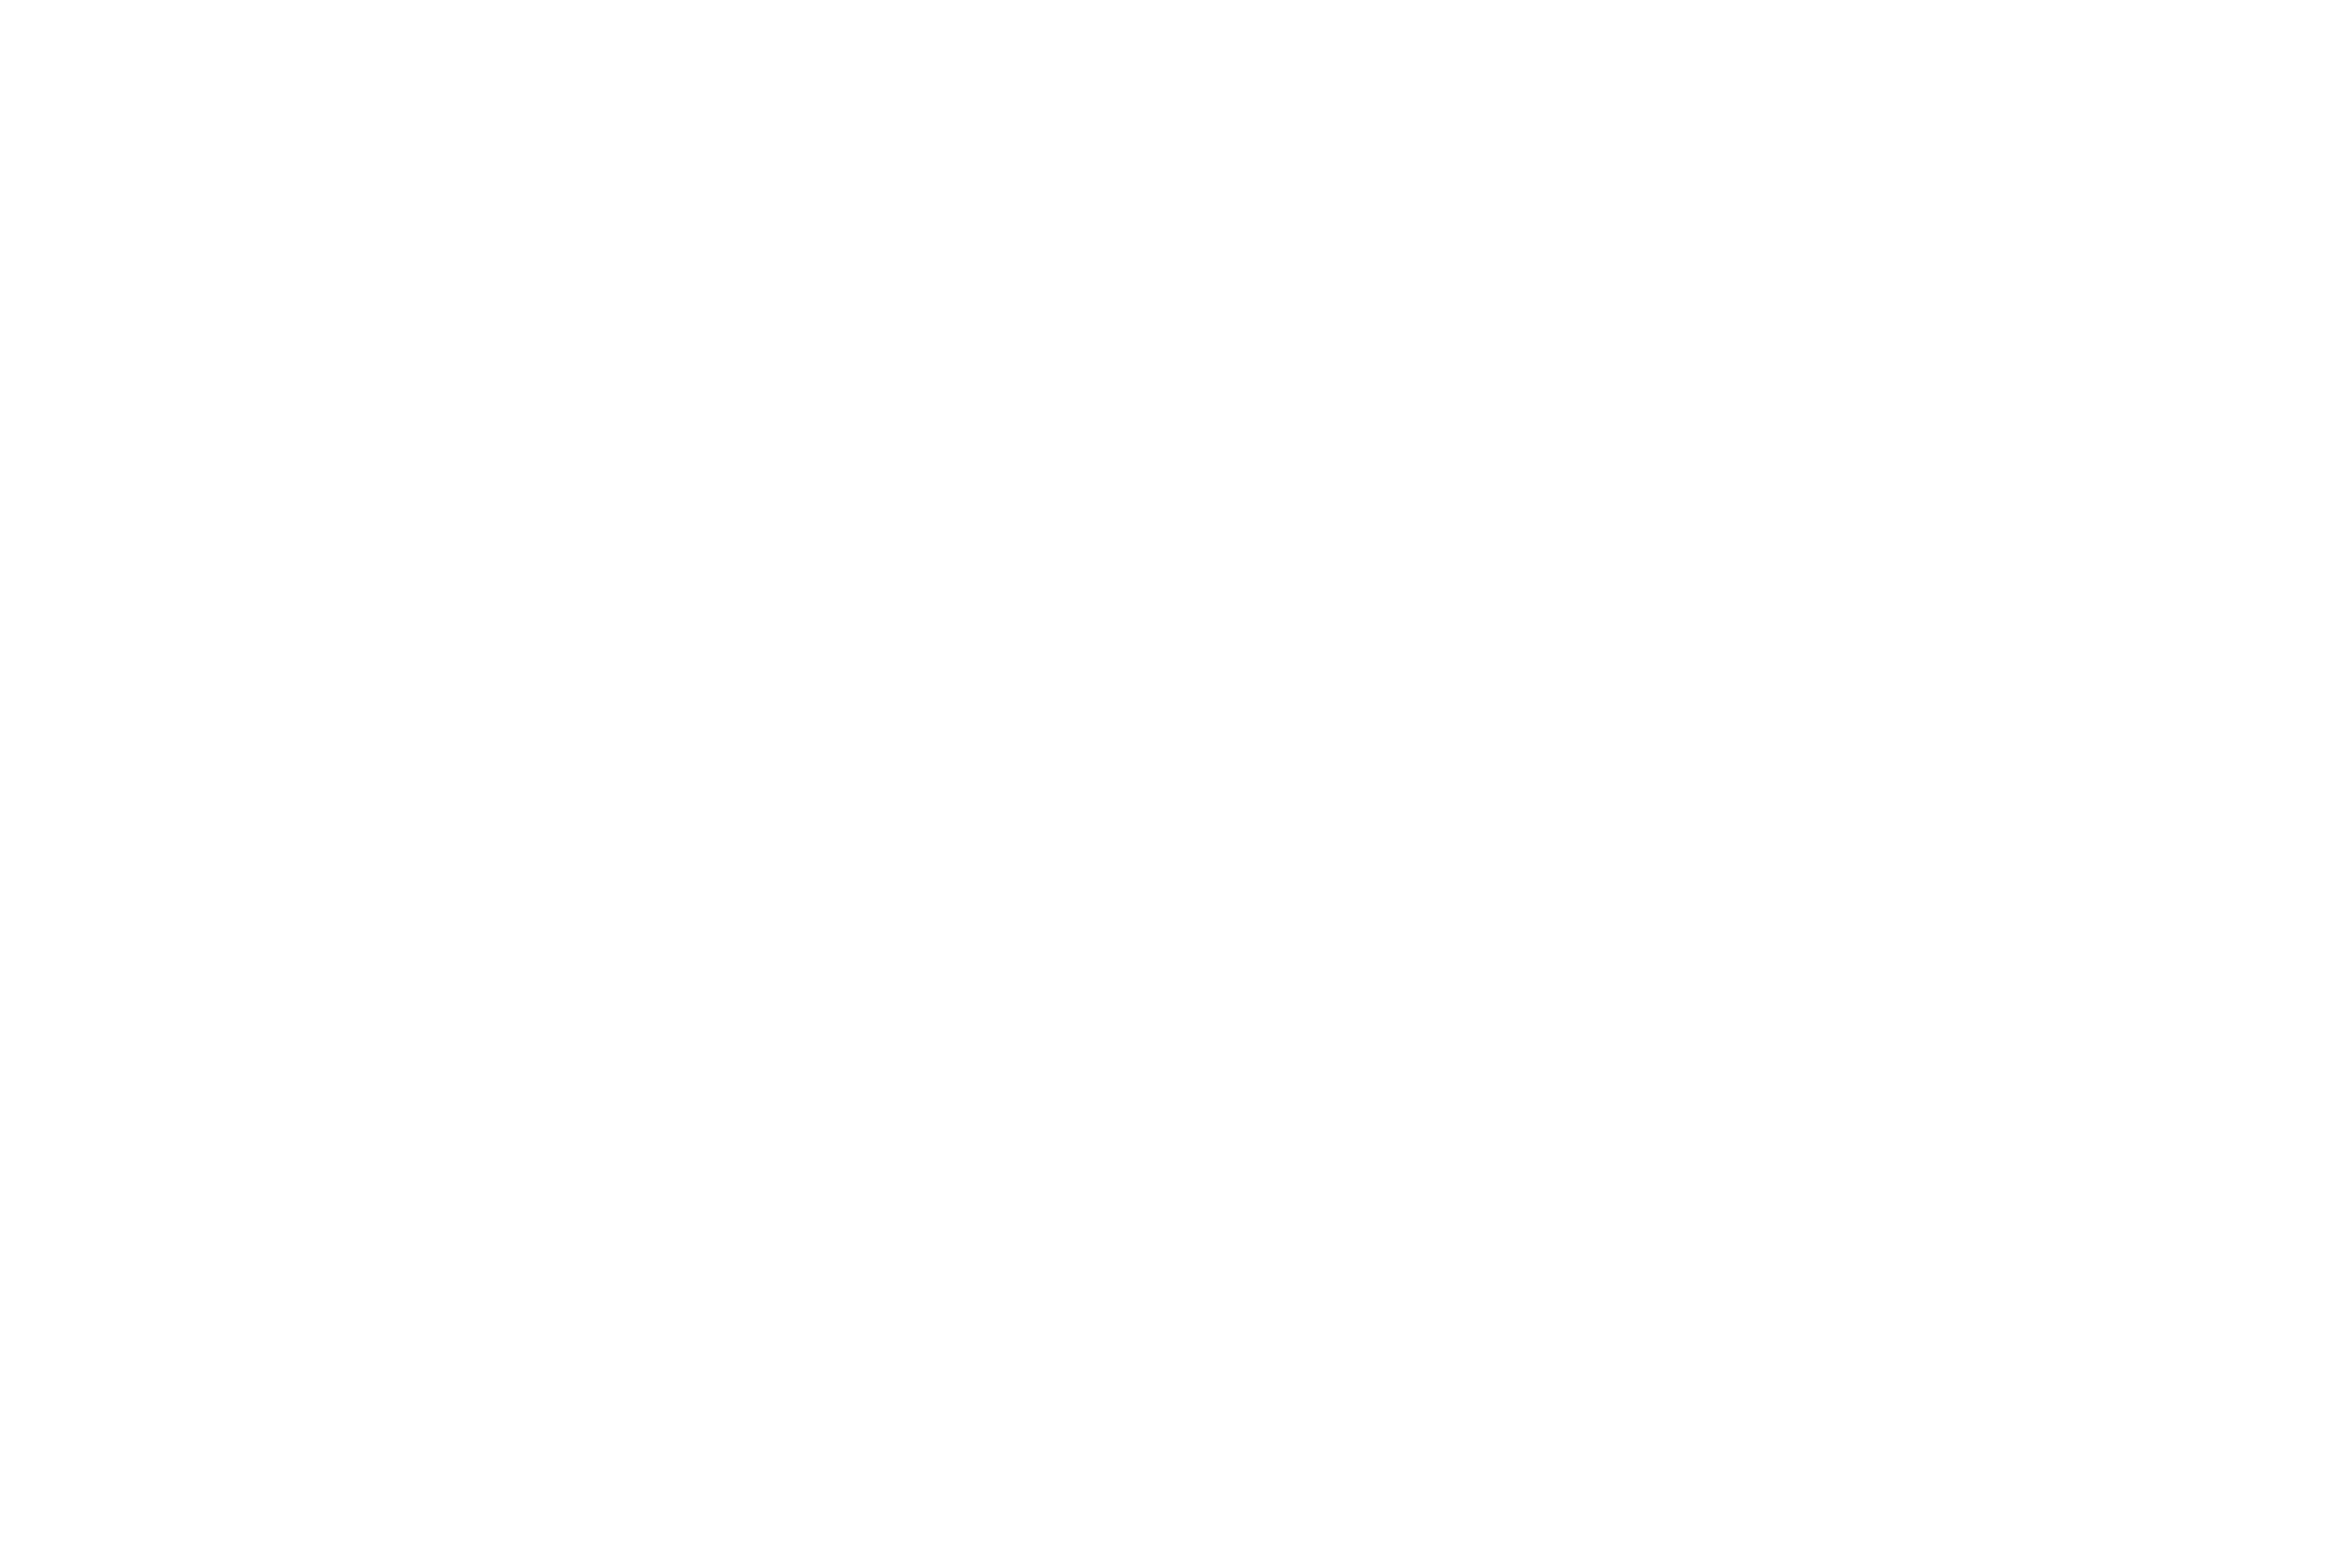

<IPython.core.display.Javascript object>


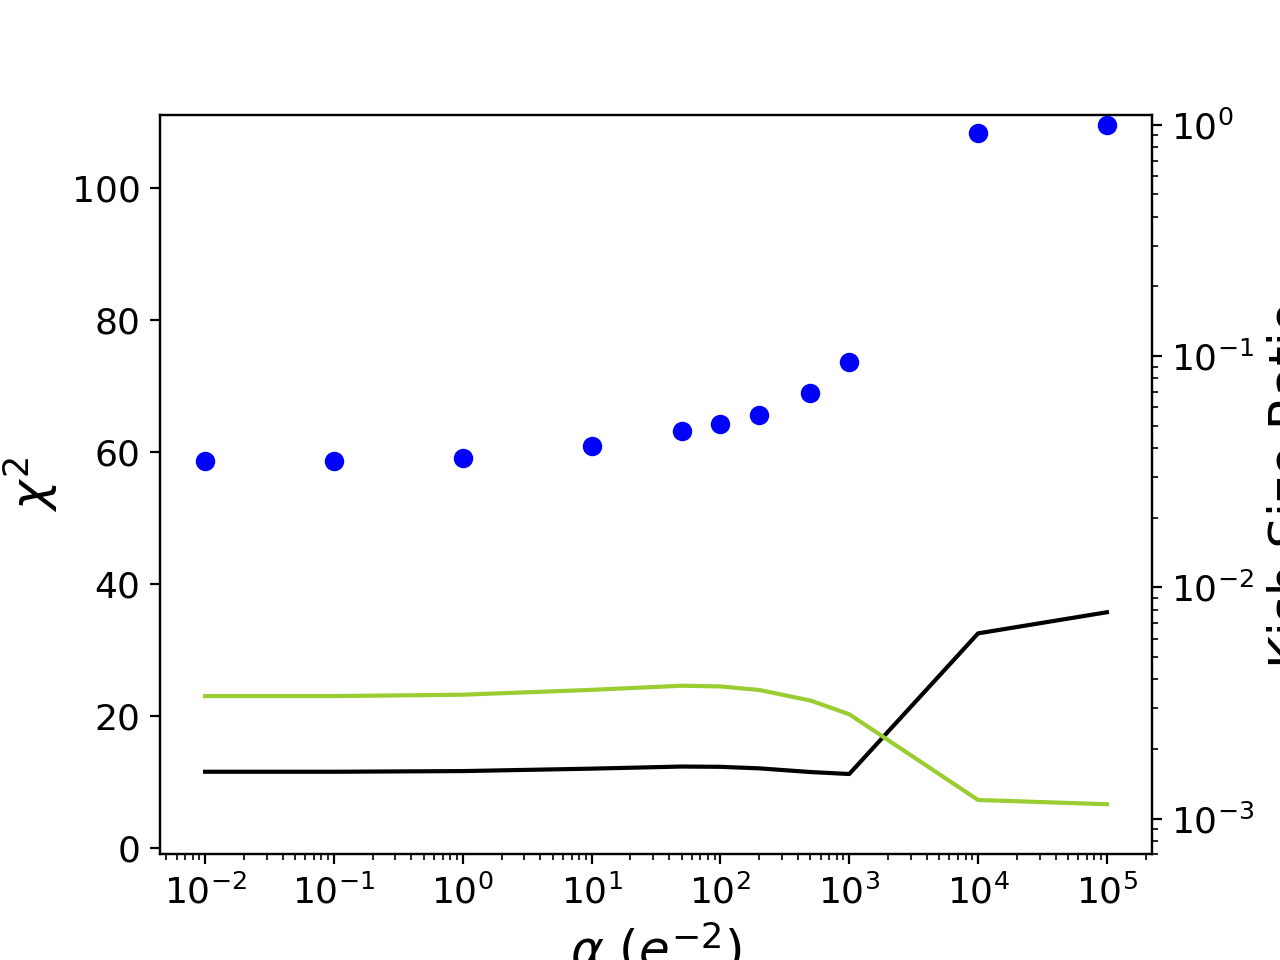

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, np.array(CV)[:,3], color='black', label=r'$\chi ^2$ total average ')
ax1.plot(Al, np.array(CV)[:,2], color='yellowgreen', label=r'$\chi ^2$ validation dataset ')

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
#ax2.set_ylim([0.0006,1.3])

#ax2.plot(Al, ksr, 'o', color='r', label=r'KSR training dataset')
ax2.plot(Al, np.array(CV)[:,4] , 'o', color='b', label=r'KSR validation dataset')
ax1.set_xscale('log')
ax2.set_yscale('log')
#plt.set_xlabel('log(Alpha)', fontsize=15)
#plt.ylabel('lambda value', fontsize=15)
#ax1.set_title('A <-> m6A replicas distribution', fontsize  =15 )
ax1.set_ylim(-1,111)
ax2.set_ylim(0.0007,1.1)
ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\chi ^2$', fontsize  =18)
ax2.set_ylabel('Kish Size Ratio', fontsize  =18)
#ax2.set_ylim(0,100)
#ax2.legend(ncol=2, bbox_to_anchor=(1.1, 1.16), fontsize=15, frameon=False)
#ax2.legend(loc='upper left', fontsize=18)
plt.savefig('civa.png', format='png', dpi=500, bbox_inches='tight')
plt.show()